In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 40
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import pointbiserialr
from collections import Counter
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### File Import

In [2]:
df_telco_dataSet=pd.read_csv('D:/UWE/MachineLearning/Assignment/DataSet/SLT/slt_ds.csv') # import CSV
df_telco_dataSet

M_Revenue   M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0        23.9975  219.25        22.500    0.2475          0.00       0.0   
1        57.4925  482.75        37.425    0.2475         22.75       9.1   
2        16.9900   10.25        16.990    0.0000          0.00       0.0   
3        38.0000    7.50        38.000    0.0000          0.00       0.0   
4        55.2300  570.50        71.980    0.0000          0.00       0.0   
...          ...     ...           ...       ...           ...       ...   
99995        NaN     NaN           NaN       NaN           NaN       NaN   
99996        NaN     NaN           NaN       NaN           NaN       NaN   
99997        NaN     NaN           NaN       NaN           NaN       NaN   
99998        NaN     NaN           NaN       NaN           NaN       NaN   
99999        NaN     NaN           NaN       NaN           NaN       NaN   

       voice_rev  data_rev  num_roaming  charge_prev_mnt  ...  forgntvl  \
0            0.0       0.0          0.0          -157.25  ...       0.0   
1            9.1       0.0          0.0           532.25  ...       0.0   
2            0.0       0.0          0.0            -4.25  ...       0.0   
3            0.0       0.0          0.0            -1.50  ...       0.0   
4            0.0       0.0          0.0            38.50  ...       0.0   
...          ...       ...          ...              ...  ...       ...   
99995        NaN       NaN          NaN              NaN  ...       0.0   
99996        NaN       NaN          NaN              NaN  ...       0.0   
99997        NaN       NaN          NaN              NaN  ...       0.0   
99998        NaN       NaN          NaN              NaN  ...       0.0   
99999        NaN       NaN          NaN              NaN  ...       0.0   

       ethnic  kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  \
0           N       U       U        U         U         U         Y    361.0   
1           Z       U       U        U         U         U         Y    240.0   
2           N       U       Y        U         U         U         Y   1504.0   
3           U       Y       U        U         U         U         Y   1812.0   
4           I       U       U        U         U         U         Y    434.0   
...       ...     ...     ...      ...       ...       ...       ...      ...   
99995       S       U       U        U         Y         U         Y    773.0   
99996       N       U       U        Y         Y         Y         Y    835.0   
99997       U       Y       Y        U         U         U         N    433.0   
99998       S       U       U        U         U         U         N     75.0   
99999       H       U       U        U         U         U         N      5.0   

       Customer_ID  
0          1000001  
1          1000002  
2          1000003  
3          1000004  
4          1000005  
...            ...  
99995      1099996  
99996      1099997  
99997      1099998  
99998      1099999  
99999      1100000  

[100000 rows x 100 columns]

## Data Understanding

In [3]:
df_telco_dataSet.shape 

(100000, 100)

In [4]:
df_telco_dataSet.head 

<bound method NDFrame.head of        M_Revenue   M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0        23.9975  219.25        22.500    0.2475          0.00       0.0   
1        57.4925  482.75        37.425    0.2475         22.75       9.1   
2        16.9900   10.25        16.990    0.0000          0.00       0.0   
3        38.0000    7.50        38.000    0.0000          0.00       0.0   
4        55.2300  570.50        71.980    0.0000          0.00       0.0   
...          ...     ...           ...       ...           ...       ...   
99995        NaN     NaN           NaN       NaN           NaN       NaN   
99996        NaN     NaN           NaN       NaN           NaN       NaN   
99997        NaN     NaN           NaN       NaN           NaN       NaN   
99998        NaN     NaN           NaN       NaN           NaN       NaN   
99999        NaN     NaN           NaN       NaN           NaN       NaN   

       voice_rev  data_rev  num_roaming  charge_prev_mnt 

In [5]:
df_telco_dataSet.tail # print tail

<bound method NDFrame.tail of        M_Revenue   M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0        23.9975  219.25        22.500    0.2475          0.00       0.0   
1        57.4925  482.75        37.425    0.2475         22.75       9.1   
2        16.9900   10.25        16.990    0.0000          0.00       0.0   
3        38.0000    7.50        38.000    0.0000          0.00       0.0   
4        55.2300  570.50        71.980    0.0000          0.00       0.0   
...          ...     ...           ...       ...           ...       ...   
99995        NaN     NaN           NaN       NaN           NaN       NaN   
99996        NaN     NaN           NaN       NaN           NaN       NaN   
99997        NaN     NaN           NaN       NaN           NaN       NaN   
99998        NaN     NaN           NaN       NaN           NaN       NaN   
99999        NaN     NaN           NaN       NaN           NaN       NaN   

       voice_rev  data_rev  num_roaming  charge_prev_mnt 

In [6]:
df_telco_dataSet.describe

<bound method NDFrame.describe of        M_Revenue   M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0        23.9975  219.25        22.500    0.2475          0.00       0.0   
1        57.4925  482.75        37.425    0.2475         22.75       9.1   
2        16.9900   10.25        16.990    0.0000          0.00       0.0   
3        38.0000    7.50        38.000    0.0000          0.00       0.0   
4        55.2300  570.50        71.980    0.0000          0.00       0.0   
...          ...     ...           ...       ...           ...       ...   
99995        NaN     NaN           NaN       NaN           NaN       NaN   
99996        NaN     NaN           NaN       NaN           NaN       NaN   
99997        NaN     NaN           NaN       NaN           NaN       NaN   
99998        NaN     NaN           NaN       NaN           NaN       NaN   
99999        NaN     NaN           NaN       NaN           NaN       NaN   

       voice_rev  data_rev  num_roaming  charge_prev_

In [7]:
df_telco_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   M_Revenue              99643 non-null   float64
 1   M_Min                  99643 non-null   float64
 2   M_rec_charge           99643 non-null   float64
 3   d_charge               99643 non-null   float64
 4   over_min_use           99643 non-null   float64
 5   over_rev               99643 non-null   float64
 6   voice_rev              99643 non-null   float64
 7   data_rev               99643 non-null   float64
 8   num_roaming            99643 non-null   float64
 9   charge_prev_mnt        99109 non-null   float64
 10  change_rev             99109 non-null   float64
 11  drop_voice             100000 non-null  float64
 12  drop_dat               100000 non-null  float64
 13  blk_voice              100000 non-null  float64
 14  blk_dat                100000 non-nu

## Identify object type variable 

In [8]:
df_telco_dataSet.dtypes

M_Revenue       float64
M_Min           float64
M_rec_charge    float64
d_charge        float64
over_min_use    float64
                 ...   
kid11_15         object
kid16_17         object
creditcd         object
eqpdays         float64
Customer_ID       int64
Length: 100, dtype: object

In [9]:
df_telco_dataSet.select_dtypes(include=['object'])

new_user credit_code acc_spend social_group       area dualband  \
0            U           A         N            S    Colombo        Y   
1            N          EA         N            U    Gampaha        N   
2            Y           C         N            S   Kalutara        N   
3            Y           B         N            T    Gampaha        N   
4            Y           A         N            U      Galle        Y   
...        ...         ...       ...          ...        ...      ...   
99995        U           B         N            U    Badulla        N   
99996        U          CY         Y            S    Badulla        N   
99997        U          DA         N            U  Millativu        Y   
99998        U          EA         N            U  Millativu        Y   
99999        U           B         N            S    Badulla        Y   

      refurb_new hnd_webcap ownrent dwlltype  ... infobase HHstatin dwllsize  \
0              N       WCMB       O        S  ...        M        C        A   
1              N         WC     NaN        S  ...        M        C        A   
2              N        NaN       O        S  ...        M        C        A   
3              N        NaN     NaN        M  ...        M        C        D   
4              N       WCMB       R        M  ...        M        C        O   
...          ...        ...     ...      ...  ...      ...      ...      ...   
99995          N         WC       O        S  ...        M      NaN        A   
99996          N         WC       O        S  ...        M        I        A   
99997          N       WCMB     NaN      NaN  ...        M      NaN      NaN   
99998          N       WCMB     NaN      NaN  ...      NaN      NaN      NaN   
99999          N       WCMB     NaN        S  ...        M      NaN        A   

      ethnic kid0_2 kid3_5 kid6_10 kid11_15 kid16_17 creditcd  
0          N      U      U       U        U        U        Y  
1          Z      U      U       U        U        U        Y  
2          N      U      Y       U        U        U        Y  
3          U      Y      U       U        U        U        Y  
4          I      U      U       U        U        U        Y  
...      ...    ...    ...     ...      ...      ...      ...  
99995      S      U      U       U        Y        U        Y  
99996      N      U      U       Y        Y        Y        Y  
99997      U      Y      Y       U        U        U        N  
99998      S      U      U       U        U        U        N  
99999      H      U      U       U        U        U        N  

[100000 rows x 21 columns]

In [10]:
for i in df_telco_dataSet.select_dtypes(include=['object']):
    print(i)

new_user
credit_code
acc_spend
social_group
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital
infobase
HHstatin
dwllsize
ethnic
kid0_2
kid3_5
kid6_10
kid11_15
kid16_17
creditcd


In [11]:
df_telco_dataSet['churn_status']

0        1
1        0
2        1
3        0
4        0
        ..
99995    1
99996    0
99997    0
99998    0
99999    1
Name: churn_status, Length: 100000, dtype: int64

In [12]:
unique_values = df_telco_dataSet['area'].unique()
unique_values

array(['Colombo', 'Gampaha', 'Kalutara', 'Galle', 'Matara', 'Hambantota',
       'Kurunegala', 'Puttalam', 'Jaffna', 'Vaunia', 'Kilinochchi',
       'Millativu', 'Anuradhapura', 'Polonnaruwa', 'Kandy', 'Matale',
       'NuwaraEliya', 'Monaragala', nan, 'Badulla'], dtype=object)

## Count churn true or false

In [13]:
obj_cols=df_telco_dataSet.select_dtypes(include=['object']).columns # count object type variale 
num_obj_cols=len(obj_cols)
num_obj_cols


21

churn_status
0    50438
1    49562
Name: count, dtype: int64


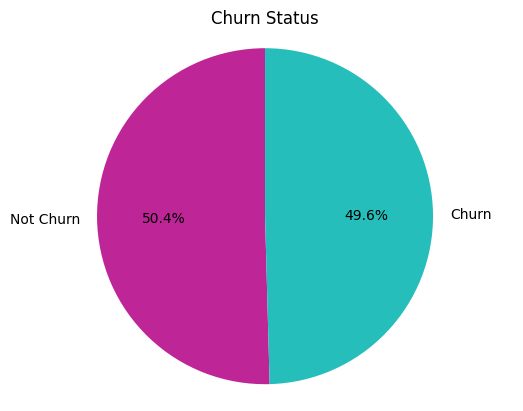

In [14]:
#Churn_Status Count -Data Distribution 
no_of_churn=df_telco_dataSet['churn_status'].value_counts()
print(no_of_churn)

data_labels=["Not Churn",'Churn']
data_size=no_of_churn.values
colors=["#be2596","#25BEBB"]
figPie,axPie =plt.subplots()
axPie.pie(data_size,colors=colors,labels=data_labels,startangle=90,autopct='%1.1f%%')
axPie.axis('equal')
plt.title('Churn Status')
plt.show()



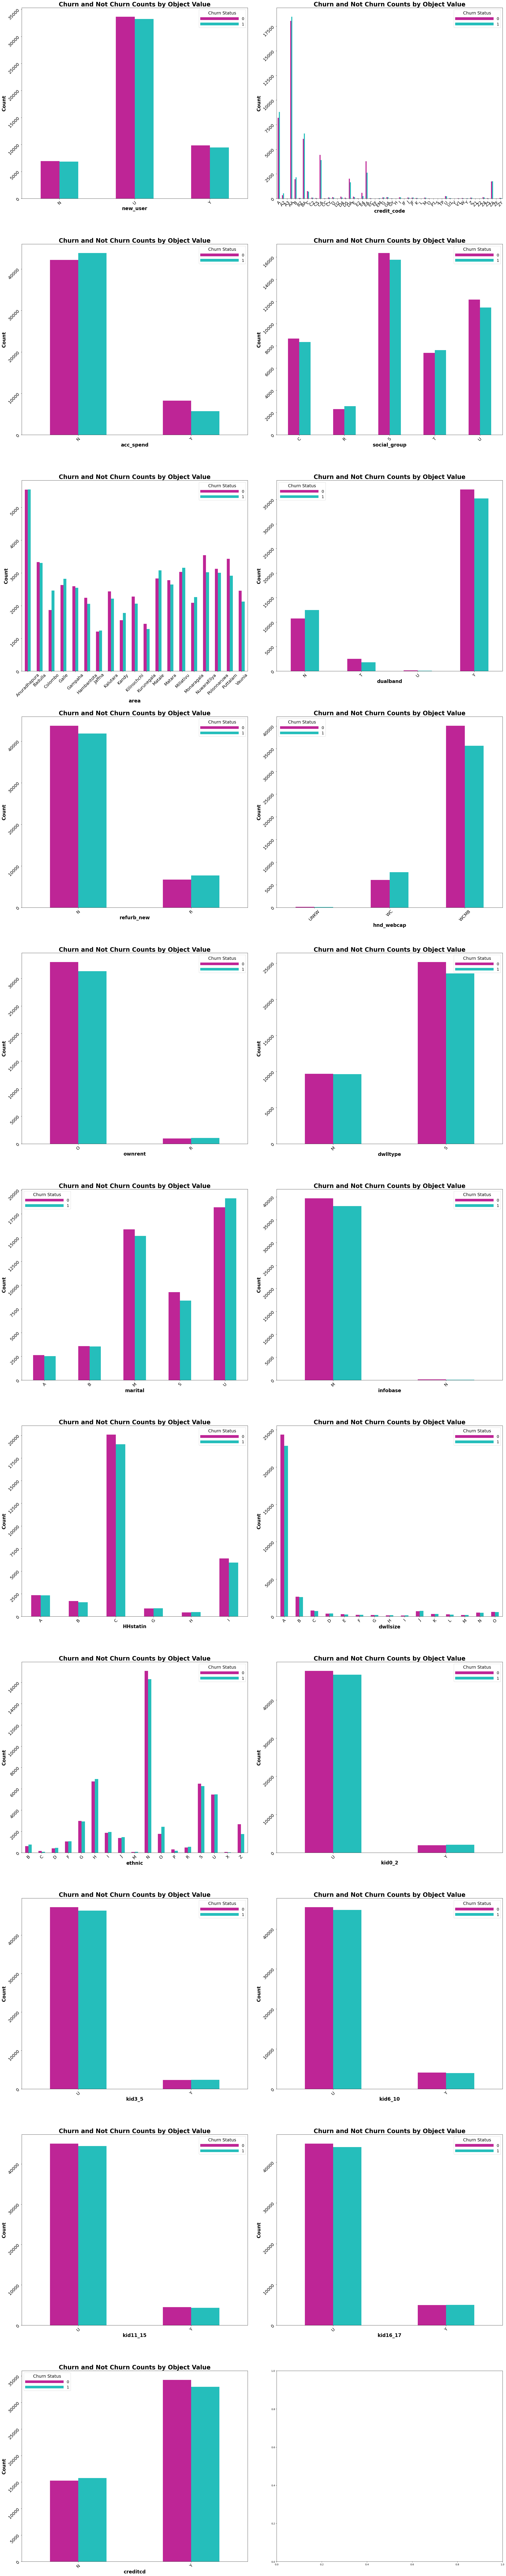

In [15]:
# sub plotting features Vs. Churn Status 
obj_cols=df_telco_dataSet.select_dtypes(include=['object']).columns
num_obj_cols=len(obj_cols)
num_obj_cols

grid_columns=2
grid_rows=(num_obj_cols+1)//grid_columns
grid_rows

fig, axs = plt.subplots(grid_rows, grid_columns, figsize=(30,150))

dictP={}

for index,column_name in enumerate(obj_cols):
    
    xAxis=index//2
    yAxis=index%2 
    axMarker=axs[xAxis,yAxis]
    churn_count = df_telco_dataSet.groupby([column_name,'churn_status']).size().unstack(fill_value=0)
    churn_count.plot(kind="bar", stacked=False, color=['#be2596', '#25BEBB'],ax=axMarker)
    axMarker.set_xlabel(column_name,fontsize=20,fontweight='bold')  
    axMarker.set_ylabel('Count',fontsize=20,fontweight='bold') 
    axMarker.set_title('Churn and Not Churn Counts by Object Value',fontsize=25,fontweight='bold') 
    axMarker.tick_params(axis='x', rotation=45,labelsize=18)
    axMarker.tick_params(axis='y', rotation=45,labelsize=18)
    axMarker.legend(fontsize='16', title='Churn Status', title_fontsize='18', handlelength=10)
    
    
    #check p value 
    #Evaluvation - Chi-square for identify to singnificant association between categorical variable Vs. Target Variable (Churn_status)
    
    contingency_table = pd.crosstab(df_telco_dataSet[column_name], df_telco_dataSet['churn_status'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    dictP[column_name] = p_value
    

    
    
    
    #print(max)
#plt.tick_params(axis='both',labelsize=18,labelcolor='black')
#plt.xticks(fontsize=18,fontweight='bold')
#plt.yticks(fontsize=18,fontweight='bold')
#plt.xticks(ticks=[0, 1], labels=['Churn', 'Not Churn']) 
plt.tight_layout(pad=3.0)
plt.show()
plt.close(fig)
#print(dictP)

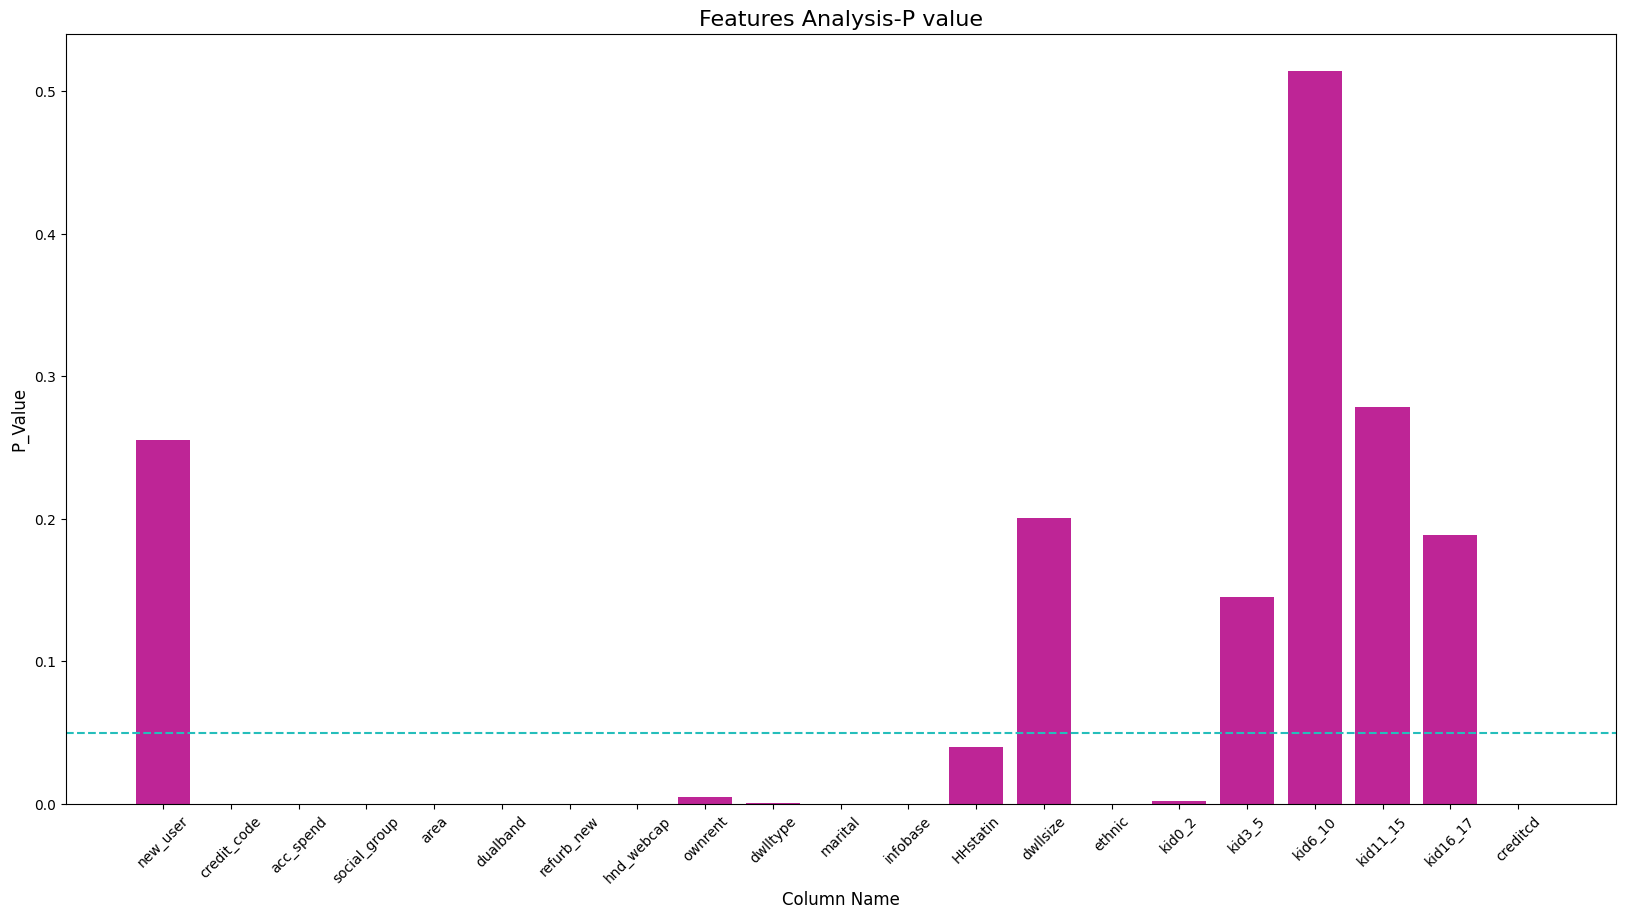

In [16]:
colName=list(dictP.keys())
p_val=list(dictP.values())

plt.figure(figsize=(20,10))
plt.bar(colName,p_val,color='#be2596')
plt.xlabel('Column Name',fontsize=12)
plt.ylabel('P_Value',fontsize=12)
plt.title('Features Analysis-P value',fontsize=16)
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='#25BEBB', linestyle='--', label='p_Value')

## remove the categorical objects that >0.05, which failed to reject the null hypothesis

In [17]:
df_telco_dataSet.drop(['new_user','dwllsize','kid3_5','kid6_10','kid11_15','kid16_17'],axis=1,inplace=True)
df_telco_dataSet

M_Revenue   M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0        23.9975  219.25        22.500    0.2475          0.00       0.0   
1        57.4925  482.75        37.425    0.2475         22.75       9.1   
2        16.9900   10.25        16.990    0.0000          0.00       0.0   
3        38.0000    7.50        38.000    0.0000          0.00       0.0   
4        55.2300  570.50        71.980    0.0000          0.00       0.0   
...          ...     ...           ...       ...           ...       ...   
99995        NaN     NaN           NaN       NaN           NaN       NaN   
99996        NaN     NaN           NaN       NaN           NaN       NaN   
99997        NaN     NaN           NaN       NaN           NaN       NaN   
99998        NaN     NaN           NaN       NaN           NaN       NaN   
99999        NaN     NaN           NaN       NaN           NaN       NaN   

       voice_rev  data_rev  num_roaming  charge_prev_mnt  ...  infobase  \
0            0.0       0.0          0.0          -157.25  ...         M   
1            9.1       0.0          0.0           532.25  ...         M   
2            0.0       0.0          0.0            -4.25  ...         M   
3            0.0       0.0          0.0            -1.50  ...         M   
4            0.0       0.0          0.0            38.50  ...         M   
...          ...       ...          ...              ...  ...       ...   
99995        NaN       NaN          NaN              NaN  ...         M   
99996        NaN       NaN          NaN              NaN  ...         M   
99997        NaN       NaN          NaN              NaN  ...         M   
99998        NaN       NaN          NaN              NaN  ...       NaN   
99999        NaN       NaN          NaN              NaN  ...         M   

       income  numbcars  HHstatin  forgntvl  ethnic  kid0_2  creditcd  \
0         4.0       3.0         C       0.0       N       U         Y   
1         5.0       1.0         C       0.0       Z       U         Y   
2         5.0       2.0         C       0.0       N       U         Y   
3         6.0       1.0         C       0.0       U       Y         Y   
4         6.0       1.0         C       0.0       I       U         Y   
...       ...       ...       ...       ...     ...     ...       ...   
99995     4.0       2.0       NaN       0.0       S       U         Y   
99996     7.0       2.0         I       0.0       N       U         Y   
99997     9.0       NaN       NaN       0.0       U       Y         N   
99998     NaN       NaN       NaN       0.0       S       U         N   
99999     4.0       NaN       NaN       0.0       H       U         N   

       eqpdays  Customer_ID  
0        361.0      1000001  
1        240.0      1000002  
2       1504.0      1000003  
3       1812.0      1000004  
4        434.0      1000005  
...        ...          ...  
99995    773.0      1099996  
99996    835.0      1099997  
99997    433.0      1099998  
99998     75.0      1099999  
99999      5.0      1100000  

[100000 rows x 94 columns]

## Visualize Null Value Distribution
  

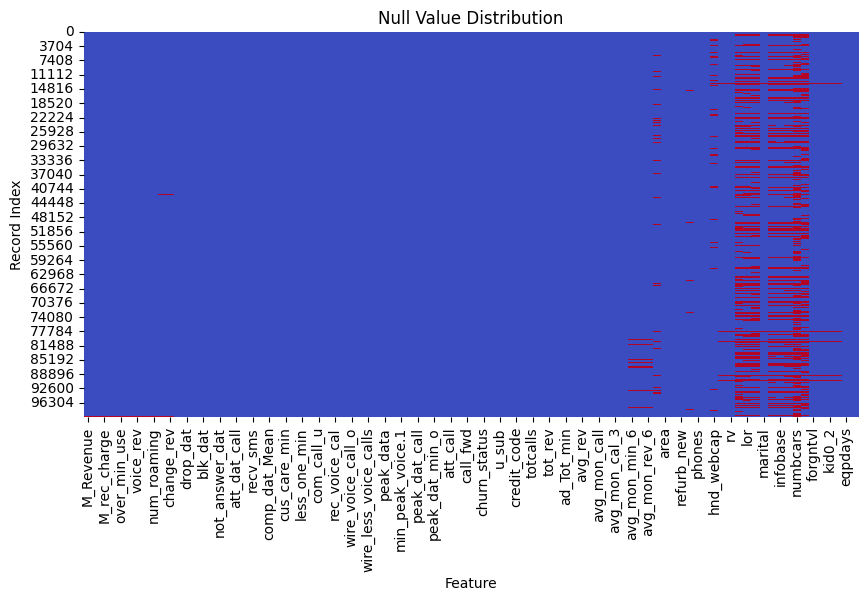

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df_telco_dataSet.isnull(),cbar=False,cmap='coolwarm')
plt.ylabel("Record Index")
plt.xlabel("Feature")
plt.title("Null Value Distribution")
plt.show()

In [19]:
df_telco_dataSet['lor'].head()

0    15.0
1     1.0
2     7.0
3     6.0
4     5.0
Name: lor, dtype: float64

In [20]:
df_telco_dataSet.columns[df_telco_dataSet.isnull().any()]

Index(['M_Revenue', 'M_Min', 'M_rec_charge', 'd_charge', 'over_min_use',
       'over_rev', 'voice_rev', 'data_rev', 'num_roaming', 'charge_prev_mnt',
       'change_rev', 'avg_mon_min_6', 'avg_mon_cal_6', 'avg_mon_rev_6',
       'social_group', 'area', 'dualband', 'refurb_new', 'hnd_price', 'phones',
       'models', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype',
       'marital', 'adults', 'infobase', 'income', 'numbcars', 'HHstatin',
       'forgntvl', 'ethnic', 'kid0_2', 'creditcd', 'eqpdays'],
      dtype='object')

## identify % of missing data

In [21]:
# missing data search
dictMissing_Data={}
for missing_data_column in df_telco_dataSet.columns[df_telco_dataSet.isnull().any()]:
    total_entries =  len(df_telco_dataSet[missing_data_column])
   # print(total_entries)
    missing_percentage = df_telco_dataSet[missing_data_column].isnull().sum() / total_entries * 100
  #  print(missing_percentage)
    dictMissing_Data[missing_data_column]=missing_percentage

print(dictMissing_Data)

    
 

{'M_Revenue': 0.357, 'M_Min': 0.357, 'M_rec_charge': 0.357, 'd_charge': 0.357, 'over_min_use': 0.357, 'over_rev': 0.357, 'voice_rev': 0.357, 'data_rev': 0.357, 'num_roaming': 0.357, 'charge_prev_mnt': 0.8909999999999999, 'change_rev': 0.8909999999999999, 'avg_mon_min_6': 2.839, 'avg_mon_cal_6': 2.839, 'avg_mon_rev_6': 2.839, 'social_group': 7.388, 'area': 0.04, 'dualband': 0.001, 'refurb_new': 0.001, 'hnd_price': 0.847, 'phones': 0.001, 'models': 0.001, 'hnd_webcap': 10.189, 'truck': 1.7319999999999998, 'rv': 1.7319999999999998, 'ownrent': 33.706, 'lor': 30.19, 'dwlltype': 31.909, 'marital': 1.7319999999999998, 'adults': 23.019000000000002, 'infobase': 22.078999999999997, 'income': 25.435999999999996, 'numbcars': 49.366, 'HHstatin': 37.923, 'forgntvl': 1.7319999999999998, 'ethnic': 1.7319999999999998, 'kid0_2': 1.7319999999999998, 'creditcd': 1.7319999999999998, 'eqpdays': 0.001}


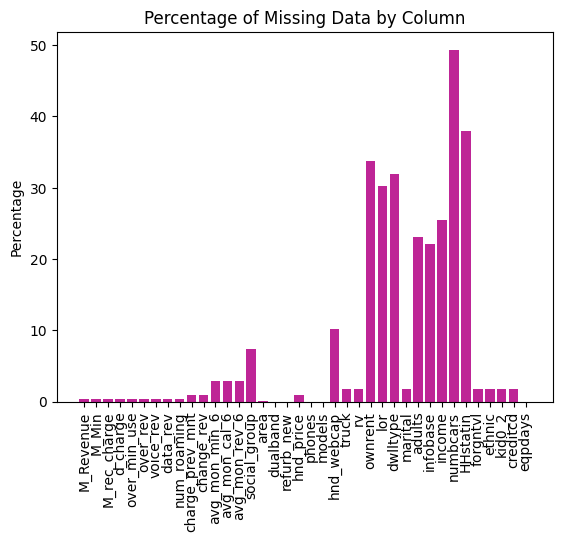

In [22]:
#missing data bar plot
missing_data_labels=dictMissing_Data.keys()
size=dictMissing_Data.values()


fig, ax = plt.subplots()
ax.bar(missing_data_labels, size,color='#be2596')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Missing Data by Column')
plt.xticks(rotation=90)  # Rotate labels to fit
plt.show()

### Fill Null values with mean

#### Filling Missing Values in Continues Variables 

In [23]:
#identify non_object(continues) missing Data
non_object_df = df_telco_dataSet.select_dtypes(exclude=['object'])
for missing_data_column_non_object in non_object_df.columns[non_object_df.isnull().any()]:
    df_telco_dataSet[missing_data_column_non_object]=df_telco_dataSet[missing_data_column_non_object].fillna(df_telco_dataSet[missing_data_column_non_object].mean())

df_telco_dataSet


M_Revenue       M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0      23.997500  219.250000     22.500000  0.247500      0.000000   0.00000   
1      57.492500  482.750000     37.425000  0.247500     22.750000   9.10000   
2      16.990000   10.250000     16.990000  0.000000      0.000000   0.00000   
3      38.000000    7.500000     38.000000  0.000000      0.000000   0.00000   
4      55.230000  570.500000     71.980000  0.000000      0.000000   0.00000   
...          ...         ...           ...       ...           ...       ...   
99995  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99996  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99997  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99998  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99999  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   

       voice_rev  data_rev  num_roaming  charge_prev_mnt  ...  infobase  \
0       0.000000  0.000000     0.000000      -157.250000  ...         M   
1       9.100000  0.000000     0.000000       532.250000  ...         M   
2       0.000000  0.000000     0.000000        -4.250000  ...         M   
3       0.000000  0.000000     0.000000        -1.500000  ...         M   
4       0.000000  0.000000     0.000000        38.500000  ...         M   
...          ...       ...          ...              ...  ...       ...   
99995  13.295062  0.261318     1.286405       -13.933818  ...         M   
99996  13.295062  0.261318     1.286405       -13.933818  ...         M   
99997  13.295062  0.261318     1.286405       -13.933818  ...         M   
99998  13.295062  0.261318     1.286405       -13.933818  ...       NaN   
99999  13.295062  0.261318     1.286405       -13.933818  ...         M   

         income  numbcars  HHstatin  forgntvl  ethnic  kid0_2  creditcd  \
0      4.000000  3.000000         C       0.0       N       U         Y   
1      5.000000  1.000000         C       0.0       Z       U         Y   
2      5.000000  2.000000         C       0.0       N       U         Y   
3      6.000000  1.000000         C       0.0       U       Y         Y   
4      6.000000  1.000000         C       0.0       I       U         Y   
...         ...       ...       ...       ...     ...     ...       ...   
99995  4.000000  2.000000       NaN       0.0       S       U         Y   
99996  7.000000  2.000000         I       0.0       N       U         Y   
99997  9.000000  1.567563       NaN       0.0       U       Y         N   
99998  5.783112  1.567563       NaN       0.0       S       U         N   
99999  4.000000  1.567563       NaN       0.0       H       U         N   

       eqpdays  Customer_ID  
0        361.0      1000001  
1        240.0      1000002  
2       1504.0      1000003  
3       1812.0      1000004  
4        434.0      1000005  
...        ...          ...  
99995    773.0      1099996  
99996    835.0      1099997  
99997    433.0      1099998  
99998     75.0      1099999  
99999      5.0      1100000  

[100000 rows x 94 columns]

# Analyze Continues Variable 

{'M_Revenue': 0.0005918350906750477, 'M_Min': 1.4722515114646264e-72, 'M_rec_charge': 4.302342748856481e-104, 'd_charge': 1.8892314277670648e-05, 'over_min_use': 4.80547527727806e-10, 'over_rev': 6.704301722271975e-14, 'voice_rev': 1.967769388194602e-14, 'data_rev': 0.6839346819462269, 'num_roaming': 0.0032480414696985085, 'charge_prev_mnt': 3.0907384108658564e-23, 'change_rev': 0.013684742151675176, 'drop_voice': 1.391041762300046e-06, 'drop_dat': 0.04907373998755171, 'blk_voice': 0.004326901059673956, 'blk_dat': 0.20412963779341528, 'not_answer_voice': 2.3544097653051557e-29, 'not_answer_dat': 0.13500229120503068, 'att_voice_call': 9.017342964426261e-53, 'att_dat_call': 0.002665710655943645, 'recv_voice_call': 6.968614073958586e-40, 'recv_sms': 0.7974621053012372, 'comp_voice': 7.135454047939005e-60, 'comp_dat_Mean': 0.004972494104972063, 'cus_care_calls': 1.1463501268867841e-30, 'cus_care_min': 4.211972076789031e-33, 'cus_care_min_u': 7.177816676162706e-29, 'less_one_min': 9.7835165

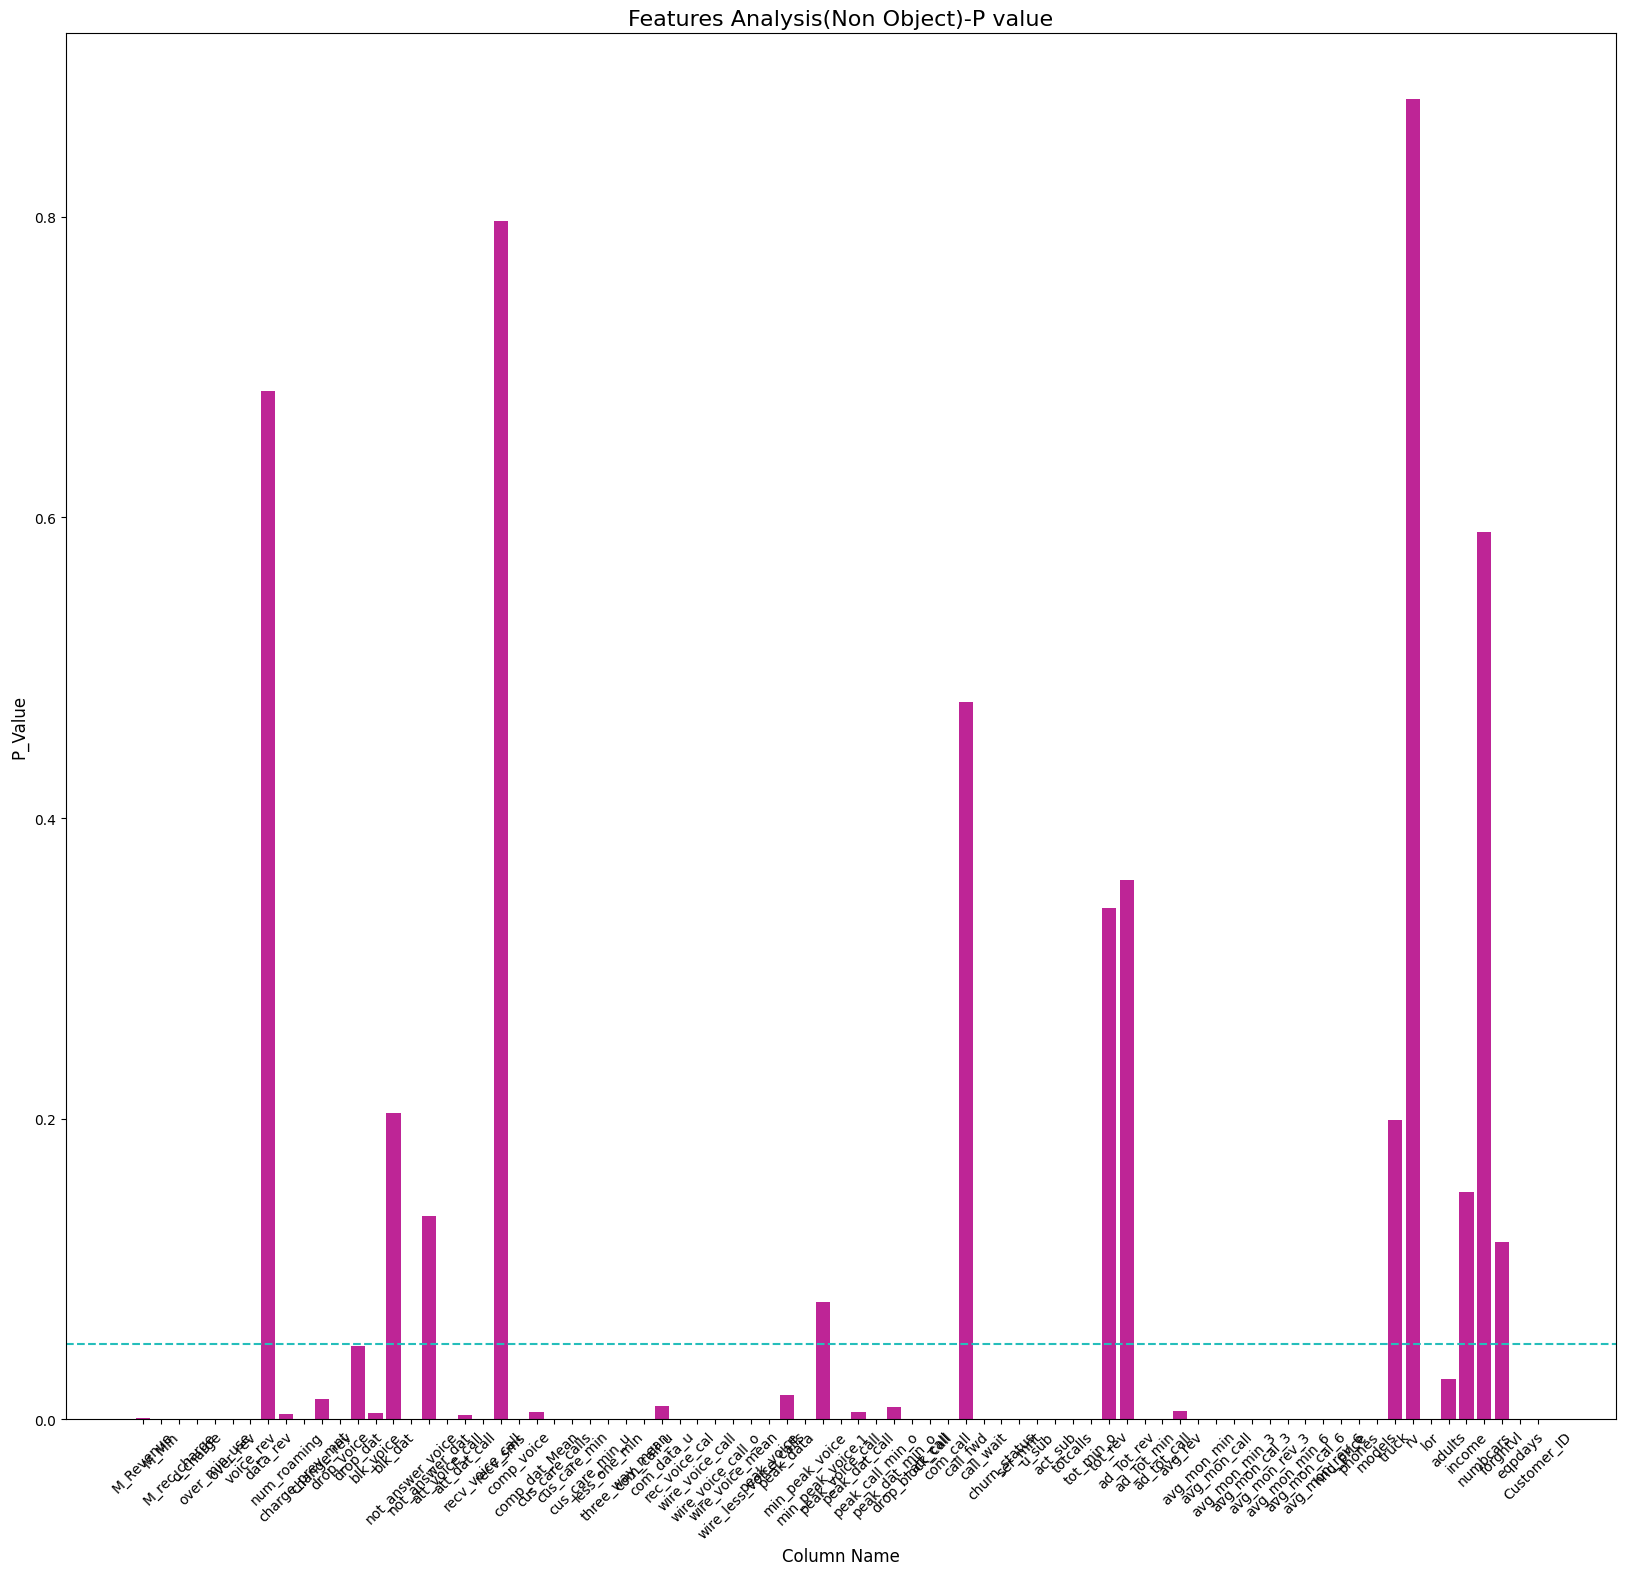

In [24]:
#analyze continues variables (boxplot) 
dict_non_Object_Pval={}
for Non_Object_col in non_object_df.columns:
    #print(Non_Object_col)
    correlation, p_value_nonObject= pointbiserialr(df_telco_dataSet['churn_status'], df_telco_dataSet[Non_Object_col]) # binary variable and categorical variable co-relation
    dict_non_Object_Pval[Non_Object_col] = p_value_nonObject # p value 
print(dict_non_Object_Pval)

colName=list(dict_non_Object_Pval.keys())
p_val=list(dict_non_Object_Pval.values())

plt.figure(figsize=(20,18))
plt.bar(colName,p_val,color='#be2596')
plt.xlabel('Column Name',fontsize=12)
plt.ylabel('P_Value',fontsize=12)
plt.title('Features Analysis(Non Object)-P value',fontsize=16)
plt.xticks(rotation=45)
plt.axhline(y=0.05, color='#25BEBB', linestyle='--', label='p_Value')





In [25]:
#Remove values with with no- correlation 
for col_name,p_val in dict_non_Object_Pval.items():
  # print(col_name)
    #print(p_val) 
    if p_val>0.05:
        print()
        df_telco_dataSet = df_telco_dataSet.drop(columns=col_name)
        
df_telco_dataSet
        

M_Revenue       M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0      23.997500  219.250000     22.500000  0.247500      0.000000   0.00000   
1      57.492500  482.750000     37.425000  0.247500     22.750000   9.10000   
2      16.990000   10.250000     16.990000  0.000000      0.000000   0.00000   
3      38.000000    7.500000     38.000000  0.000000      0.000000   0.00000   
4      55.230000  570.500000     71.980000  0.000000      0.000000   0.00000   
...          ...         ...           ...       ...           ...       ...   
99995  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99996  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99997  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99998  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99999  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  dwlltype  \
0       0.000000     0.000000      -157.250000  -18.997500  ...         S   
1       9.100000     0.000000       532.250000   50.987500  ...         S   
2       0.000000     0.000000        -4.250000    0.000000  ...         S   
3       0.000000     0.000000        -1.500000    0.000000  ...         M   
4       0.000000     0.000000        38.500000    0.000000  ...         M   
...          ...          ...              ...         ...  ...       ...   
99995  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99996  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99997  13.295062     1.286405       -13.933818   -1.021067  ...       NaN   
99998  13.295062     1.286405       -13.933818   -1.021067  ...       NaN   
99999  13.295062     1.286405       -13.933818   -1.021067  ...         S   

       marital    adults  infobase  HHstatin  ethnic  kid0_2  creditcd  \
0            S  1.000000         M         C       N       U         Y   
1            S  1.000000         M         C       Z       U         Y   
2            M  2.000000         M         C       N       U         Y   
3            M  4.000000         M         C       U       Y         Y   
4            S  1.000000         M         C       I       U         Y   
...        ...       ...       ...       ...     ...     ...       ...   
99995        M  5.000000         M       NaN       S       U         Y   
99996        M  3.000000         M         I       N       U         Y   
99997        B  1.000000         M       NaN       U       Y         N   
99998        U  2.530326       NaN       NaN       S       U         N   
99999        A  2.000000         M       NaN       H       U         N   

       eqpdays  Customer_ID  
0        361.0      1000001  
1        240.0      1000002  
2       1504.0      1000003  
3       1812.0      1000004  
4        434.0      1000005  
...        ...          ...  
99995    773.0      1099996  
99996    835.0      1099997  
99997    433.0      1099998  
99998     75.0      1099999  
99999      5.0      1100000  

[100000 rows x 81 columns]

### Fill the null values in categorical variable  with most occurance instance (mode)

In [26]:
obj_cols_modified=df_telco_dataSet.select_dtypes(include=['object']).columns
obj_cols_modified

Index(['credit_code', 'acc_spend', 'social_group', 'area', 'dualband',
       'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital',
       'infobase', 'HHstatin', 'ethnic', 'kid0_2', 'creditcd'],
      dtype='object')

In [27]:
# fill the categorical values with mode 
for cat_col_name in obj_cols_modified:
    print(cat_col_name)
    df_telco_dataSet[cat_col_name].fillna(df_telco_dataSet[cat_col_name].mode()[0], inplace=True)
df_telco_dataSet

credit_code
acc_spend
social_group
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital


C:\Users\user\AppData\Local\Temp\ipykernel_15328\4148431501.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telco_dataSet[cat_col_name].fillna(df_telco_dataSet[cat_col_name].mode()[0], inplace=True)


infobase
HHstatin
ethnic
kid0_2
creditcd


M_Revenue       M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0      23.997500  219.250000     22.500000  0.247500      0.000000   0.00000   
1      57.492500  482.750000     37.425000  0.247500     22.750000   9.10000   
2      16.990000   10.250000     16.990000  0.000000      0.000000   0.00000   
3      38.000000    7.500000     38.000000  0.000000      0.000000   0.00000   
4      55.230000  570.500000     71.980000  0.000000      0.000000   0.00000   
...          ...         ...           ...       ...           ...       ...   
99995  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99996  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99997  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99998  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99999  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  dwlltype  \
0       0.000000     0.000000      -157.250000  -18.997500  ...         S   
1       9.100000     0.000000       532.250000   50.987500  ...         S   
2       0.000000     0.000000        -4.250000    0.000000  ...         S   
3       0.000000     0.000000        -1.500000    0.000000  ...         M   
4       0.000000     0.000000        38.500000    0.000000  ...         M   
...          ...          ...              ...         ...  ...       ...   
99995  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99996  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99997  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99998  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99999  13.295062     1.286405       -13.933818   -1.021067  ...         S   

       marital    adults  infobase  HHstatin  ethnic  kid0_2  creditcd  \
0            S  1.000000         M         C       N       U         Y   
1            S  1.000000         M         C       Z       U         Y   
2            M  2.000000         M         C       N       U         Y   
3            M  4.000000         M         C       U       Y         Y   
4            S  1.000000         M         C       I       U         Y   
...        ...       ...       ...       ...     ...     ...       ...   
99995        M  5.000000         M         C       S       U         Y   
99996        M  3.000000         M         I       N       U         Y   
99997        B  1.000000         M         C       U       Y         N   
99998        U  2.530326         M         C       S       U         N   
99999        A  2.000000         M         C       H       U         N   

       eqpdays  Customer_ID  
0        361.0      1000001  
1        240.0      1000002  
2       1504.0      1000003  
3       1812.0      1000004  
4        434.0      1000005  
...        ...          ...  
99995    773.0      1099996  
99996    835.0      1099997  
99997    433.0      1099998  
99998     75.0      1099999  
99999      5.0      1100000  

[100000 rows x 81 columns]

In [28]:
sum(df_telco_dataSet.isnull().sum())

0

In [29]:
for i in df_telco_dataSet.select_dtypes(include=['int64', 'float64']):
    print(i)


M_Revenue
M_Min
M_rec_charge
d_charge
over_min_use
over_rev
voice_rev
num_roaming
charge_prev_mnt
change_rev
drop_voice
drop_dat
blk_voice
not_answer_voice
att_voice_call
att_dat_call
recv_voice_call
comp_voice
comp_dat_Mean
cus_care_calls
cus_care_min
cus_care_min_u
less_one_min
three_way_mean
com_call_u
com_data_u
rec_voice_cal
wire_voice_call
wire_voice_call_o
wire_voice_mean
wire_less_voice_calls
peak_voice
peak_data
min_peak_voice
peak_voice_call
peak_dat_call
peak_call_min_o
peak_dat_min_o
drop_block_call
att_call
com_call
call_wait
churn_status
ser_mnt
u_sub
act_sub
totcalls
tot_min_o
ad_Tot_min
ad_tot_call
avg_rev
avg_mon_min
avg_mon_call
avg_mon_min_3
avg_mon_cal_3
avg_mon_rev_3
avg_mon_min_6
avg_mon_cal_6
avg_mon_rev_6
hnd_price
phones
models
lor
adults
eqpdays
Customer_ID


In [30]:
df_telco_dataSet
    

M_Revenue       M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0      23.997500  219.250000     22.500000  0.247500      0.000000   0.00000   
1      57.492500  482.750000     37.425000  0.247500     22.750000   9.10000   
2      16.990000   10.250000     16.990000  0.000000      0.000000   0.00000   
3      38.000000    7.500000     38.000000  0.000000      0.000000   0.00000   
4      55.230000  570.500000     71.980000  0.000000      0.000000   0.00000   
...          ...         ...           ...       ...           ...       ...   
99995  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99996  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99997  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99998  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   
99999  58.719985  513.559937     46.179136  0.888828     41.072247  13.55956   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  dwlltype  \
0       0.000000     0.000000      -157.250000  -18.997500  ...         S   
1       9.100000     0.000000       532.250000   50.987500  ...         S   
2       0.000000     0.000000        -4.250000    0.000000  ...         S   
3       0.000000     0.000000        -1.500000    0.000000  ...         M   
4       0.000000     0.000000        38.500000    0.000000  ...         M   
...          ...          ...              ...         ...  ...       ...   
99995  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99996  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99997  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99998  13.295062     1.286405       -13.933818   -1.021067  ...         S   
99999  13.295062     1.286405       -13.933818   -1.021067  ...         S   

       marital    adults  infobase  HHstatin  ethnic  kid0_2  creditcd  \
0            S  1.000000         M         C       N       U         Y   
1            S  1.000000         M         C       Z       U         Y   
2            M  2.000000         M         C       N       U         Y   
3            M  4.000000         M         C       U       Y         Y   
4            S  1.000000         M         C       I       U         Y   
...        ...       ...       ...       ...     ...     ...       ...   
99995        M  5.000000         M         C       S       U         Y   
99996        M  3.000000         M         I       N       U         Y   
99997        B  1.000000         M         C       U       Y         N   
99998        U  2.530326         M         C       S       U         N   
99999        A  2.000000         M         C       H       U         N   

       eqpdays  Customer_ID  
0        361.0      1000001  
1        240.0      1000002  
2       1504.0      1000003  
3       1812.0      1000004  
4        434.0      1000005  
...        ...          ...  
99995    773.0      1099996  
99996    835.0      1099997  
99997    433.0      1099998  
99998     75.0      1099999  
99999      5.0      1100000  

[100000 rows x 81 columns]

## Handle Skewed data discribution

In [31]:
#preprocess data that not normally distributed. 
getListNumeriacal=[]
for i in df_telco_dataSet.select_dtypes(include=['int64', 'float64']):
    if i != 'Customer_ID':
        getListNumeriacal.append(i)
        get_sqrt=(lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x) # lamda function calculate sqrt of x (x>=1 or x<=-1)
        df_telco_dataSet[i]=df_telco_dataSet[i].apply(get_sqrt)

df_telco_dataSet

M_Revenue      M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0       4.898724  14.807093      4.743416  0.247500      0.000000  0.000000   
1       7.582381  21.971573      6.117598  0.247500      4.769696  3.016621   
2       4.121893   3.201562      4.121893  0.000000      0.000000  0.000000   
3       6.164414   2.738613      6.164414  0.000000      0.000000  0.000000   
4       7.431689  23.885142      8.484103  0.000000      0.000000  0.000000   
...          ...        ...           ...       ...           ...       ...   
99995   7.662897  22.661861      6.795523  0.888828      6.408763  3.682331   
99996   7.662897  22.661861      6.795523  0.888828      6.408763  3.682331   
99997   7.662897  22.661861      6.795523  0.888828      6.408763  3.682331   
99998   7.662897  22.661861      6.795523  0.888828      6.408763  3.682331   
99999   7.662897  22.661861      6.795523  0.888828      6.408763  3.682331   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  dwlltype  \
0       0.000000     0.000000        12.539936    4.358612  ...         S   
1       3.016621     0.000000        23.070544    7.140553  ...         S   
2       0.000000     0.000000         2.061553    0.000000  ...         S   
3       0.000000     0.000000         1.224745    0.000000  ...         M   
4       0.000000     0.000000         6.204837    0.000000  ...         M   
...          ...          ...              ...         ...  ...       ...   
99995   3.646239     1.134198         3.732803    1.010478  ...         S   
99996   3.646239     1.134198         3.732803    1.010478  ...         S   
99997   3.646239     1.134198         3.732803    1.010478  ...         S   
99998   3.646239     1.134198         3.732803    1.010478  ...         S   
99999   3.646239     1.134198         3.732803    1.010478  ...         S   

       marital    adults  infobase  HHstatin  ethnic  kid0_2  creditcd  \
0            S  1.000000         M         C       N       U         Y   
1            S  1.000000         M         C       Z       U         Y   
2            M  1.414214         M         C       N       U         Y   
3            M  2.000000         M         C       U       Y         Y   
4            S  1.000000         M         C       I       U         Y   
...        ...       ...       ...       ...     ...     ...       ...   
99995        M  2.236068         M         C       S       U         Y   
99996        M  1.732051         M         I       N       U         Y   
99997        B  1.000000         M         C       U       Y         N   
99998        U  1.590700         M         C       S       U         N   
99999        A  1.414214         M         C       H       U         N   

         eqpdays  Customer_ID  
0      19.000000      1000001  
1      15.491933      1000002  
2      38.781439      1000003  
3      42.567593      1000004  
4      20.832667      1000005  
...          ...          ...  
99995  27.802878      1099996  
99996  28.896367      1099997  
99997  20.808652      1099998  
99998   8.660254      1099999  
99999   2.236068      1100000  

[100000 rows x 81 columns]

 ## Detect and Remove Outliers 

In [32]:
df_telco_dataSet['u_sub']

0        1.414214
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
99995    1.000000
99996    1.000000
99997    1.000000
99998    1.000000
99999    1.000000
Name: u_sub, Length: 100000, dtype: float64

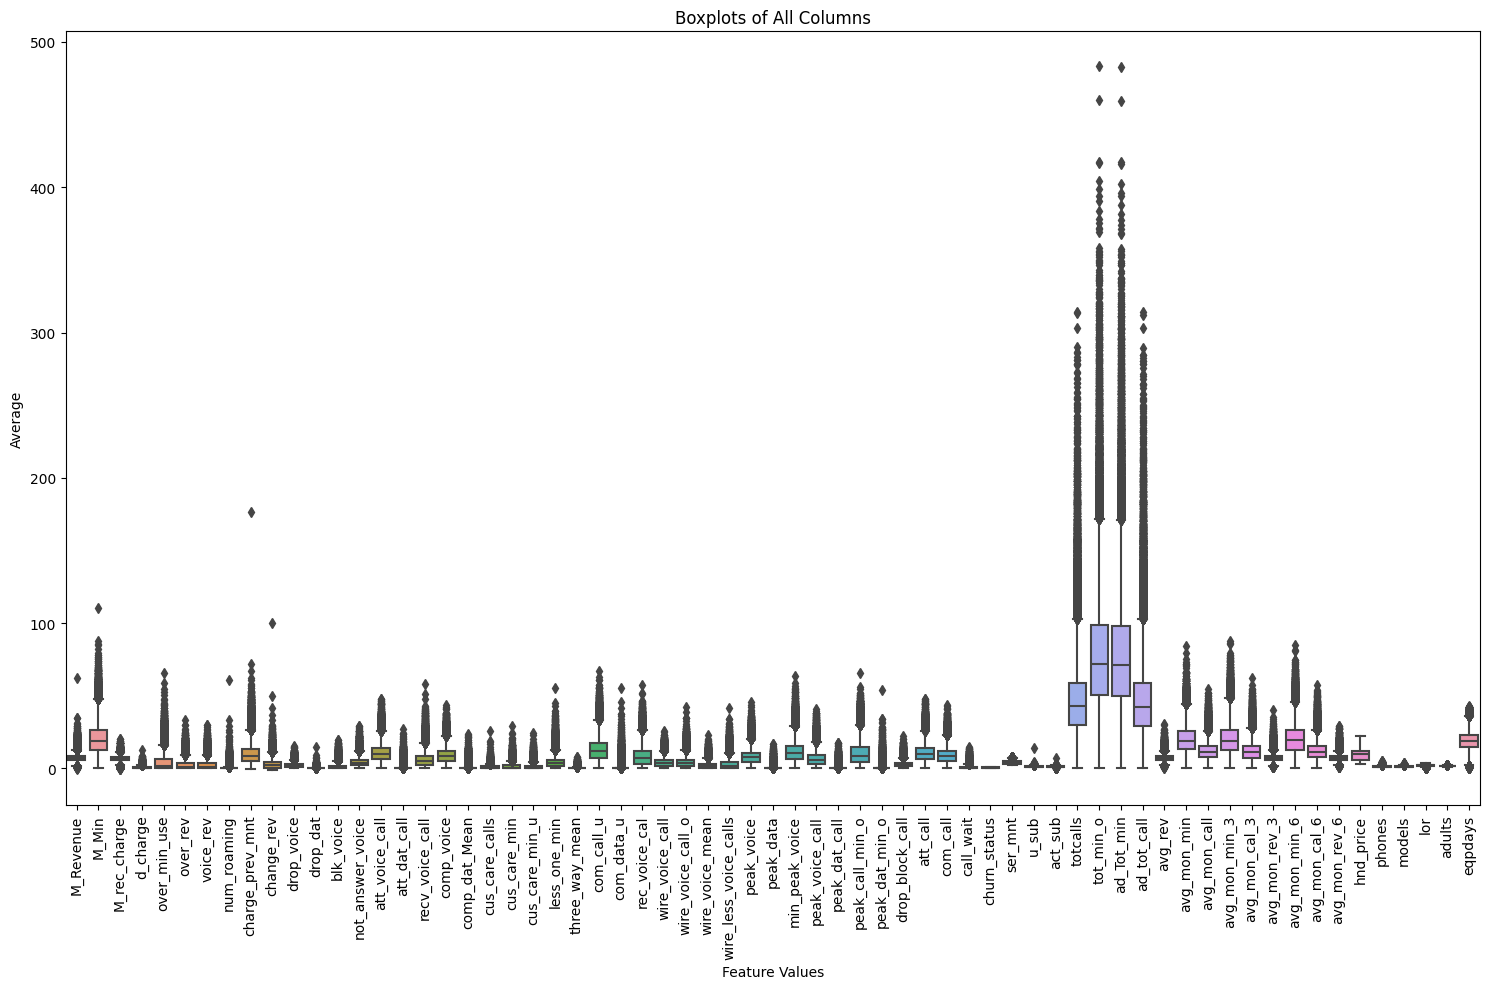

In [33]:
#outloer detection
def outlier_detection(dataFrame, colList):
    # Melt the DataFrame to long format
    melted_df = pd.melt(dataFrame[colList], var_name='Column', value_name='Value')
    
    # Plotting
    plt.figure(figsize=(15, 10))
    sns.boxplot(x='Column', y='Value', data=melted_df)
    plt.title('Boxplots of All Columns')
    plt.xlabel('Feature Values')
    plt.ylabel('Average')
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

# Assuming df_telco_dataSet and getListNumeriacal are already defined
outlier_detection(df_telco_dataSet, getListNumeriacal)

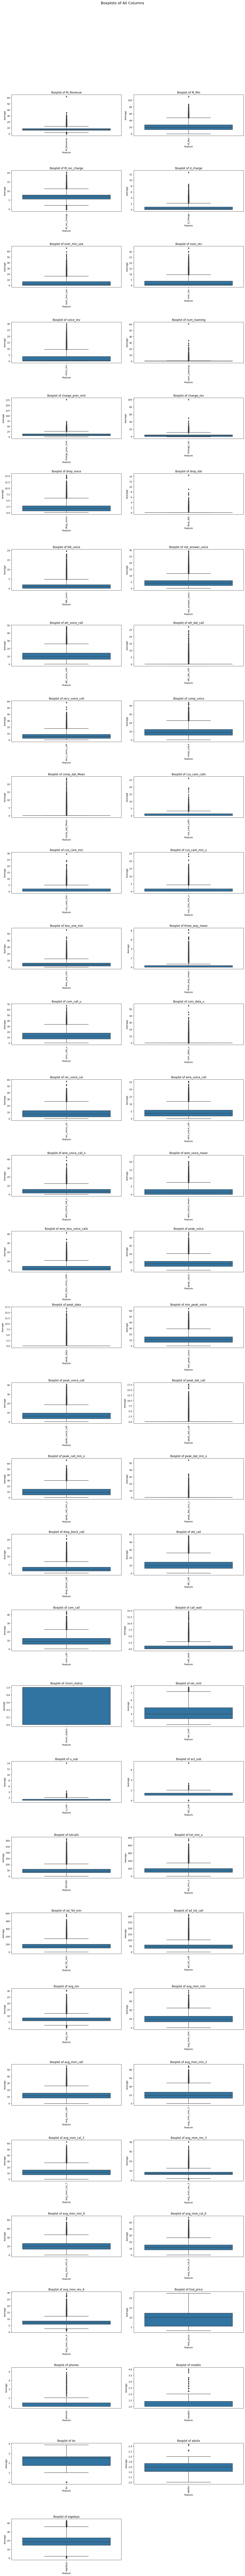

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
#box plot outlier - Separate graphs 
def outlier_detection(dataFrame, colList):
    # Calculate the number of rows needed
    n_cols = 2  # Number of plots per row
    n_rows = math.ceil(len(colList) / n_cols)  # Number of rows needed
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    fig.suptitle('All Columns ', fontsize=16)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()
    
    # Melt the DataFrame to long format for seaborn compatibility
    melted_df = pd.melt(dataFrame[colList], var_name='Column', value_name='Value')
    
    # Iterate over each column and plot on the corresponding subplot
    for i, col in enumerate(colList):
        sns.boxplot(x='Column', y='Value', data=melted_df[melted_df['Column'] == col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('Feature')
        axes[i].set_ylabel('Average')
        axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels if needed
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Assuming df_telco_dataSet and getListNumeriacal are already defined
outlier_detection(df_telco_dataSet, getListNumeriacal)

In [35]:
#remove outliers using IQR method 
def outlierRemover(dataFrame,colList):
    outlier_Index=[]
    for i in colList:
        Q1=np.percentile(dataFrame[i],25)
        Q3=np.percentile(dataFrame[i],75)
        IQR=Q3-Q1
        outlier_margin=IQR*1.5
        outlier_detect=dataFrame[(dataFrame[i]<Q1-outlier_margin)| (dataFrame[i]>Q3+outlier_margin)].index
        outlier_Index.extend(outlier_detect)
    outlier_Index=Counter(outlier_Index)
    multi_Outliers=list(p for p, x in outlier_Index.items() if x>2)
    return outlier_Index




df_telco_dataSet=df_telco_dataSet.drop(outlierRemover(df_telco_dataSet,getListNumeriacal),axis=0).reset_index(drop=True)


In [36]:
df_telco_dataSet

M_Revenue      M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
0       5.500909   5.873670      5.476313    0.0000      0.000000  0.000000   
1       5.962592  11.779219      5.915235    0.2475      0.000000  0.000000   
2       7.450671  16.186414      7.414850    0.0000      0.000000  0.000000   
3       5.500909   4.873397      5.476313    0.0000      0.000000  0.000000   
4       8.698563  15.548312      8.659677    0.0000      0.000000  0.000000   
...          ...        ...           ...       ...           ...       ...   
46031   7.070361  19.000000      7.070361    0.0000      0.000000  0.000000   
46032   5.650074   7.958224      4.121893    0.0000      6.531973  3.864367   
46033   7.071068  22.181073      7.071068    0.0000      0.000000  0.000000   
46034   5.915235   2.516611      6.707459    0.0000      0.000000  0.000000   
46035   5.476313  13.564660      5.476313    0.0000      0.000000  0.000000   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  dwlltype  \
0       0.000000          0.0         5.700877   -0.270000  ...         S   
1       0.000000          0.0         3.278719   -0.562500  ...         S   
2       0.000000          0.0         1.732051   -0.532500  ...         S   
3       0.000000          0.0         5.024938   -0.270000  ...         S   
4       0.000000          0.0         4.444097   -0.675000  ...         S   
...          ...          ...              ...         ...  ...       ...   
46031   0.000000          0.0         3.732803    1.010478  ...         S   
46032   3.864367          0.0         6.191392    3.630886  ...         S   
46033   0.000000          0.0         0.000000    0.000000  ...         S   
46034   0.000000          0.0         2.516611    0.000000  ...         S   
46035   0.000000          0.0         3.732803    1.010478  ...         S   

       marital    adults  infobase  HHstatin  ethnic  kid0_2  creditcd  \
0            U  1.590700         M         C       S       U         N   
1            M  1.000000         M         C       N       U         Y   
2            U  1.590700         M         C       N       U         N   
3            M  1.732051         M         C       I       U         Y   
4            M  2.000000         M         C       N       U         Y   
...        ...       ...       ...       ...     ...     ...       ...   
46031        U  1.590700         M         C       N       U         N   
46032        M  1.414214         M         C       H       U         Y   
46033        U  1.590700         M         C       N       U         Y   
46034        S  1.000000         M         C       N       U         Y   
46035        M  2.000000         M         I       S       Y         Y   

         eqpdays  Customer_ID  
0      17.860571      1000030  
1      25.059928      1000033  
2      33.985291      1000043  
3      31.384710      1000051  
4      15.033296      1000072  
...          ...          ...  
46031   6.708204      1099973  
46032  29.715316      1099977  
46033  29.698485      1099981  
46034  10.862780      1099982  
46035  20.273135      1099991  

[46036 rows x 81 columns]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_telco_dataSet.drop(['Customer_ID','churn_status'],axis=1), df_telco_dataSet['churn_status'], test_size=0.20, random_state=10)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((36828, 79), (9208, 79), (36828,), (9208,))

## Identify Cardinally of the categorical variables 

In [38]:
#cardinality understanding of categorical variables 
highCarVal=['credit_code','ethnic','area']
def tolleranceCalc(df,col,tol):
    temp_df=df.groupby([col])[col].count()/len(df)
    freq_var=[p for p in temp_df.loc[temp_df>tol].index.values]
    return freq_var

#print(tolleranceCalc(X_train,'area',0.05))
for i in highCarVal:
    print(tolleranceCalc(X_train,i,0.05)) # 
    print('-----------')

['A', 'AA', 'BA', 'CA']
-----------
['G', 'H', 'N', 'S', 'U']
-----------
['Anuradhapura', 'Badulla', 'Galle', 'Matale', 'Matara', 'Millativu', 'NuwaraEliya', 'Polonnaruwa', 'Puttalam']
-----------


In [39]:
#understanding most frequestly (thresold is >5%) categorical data.
def non_freq_encode(X_train,X_test,col,tol):
    print(tolleranceCalc(X_train,col,0.05))
    freq=tolleranceCalc(X_train,col,0.05)
    X_train[col]=np.where(X_train[col].isin(freq),X_train[col],'non_Frequently') # thresold<5% add to the non_frequently newly created category
    X_test[col]=np.where(X_test[col].isin(freq),X_test[col],'non_Frequently')
    return X_train,X_test 


for q in highCarVal:
    print(non_freq_encode(X_train,X_test,q,0.05))

['A', 'AA', 'BA', 'CA']
(       M_Revenue      M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
36267   7.402871  27.372431      6.707459  0.000000      8.062258  4.769696   
464     7.482814  15.329710      5.914389  0.247500      6.204837  3.670831   
14601   3.536948  10.246951      3.851298  0.000000      0.000000  0.000000   
45416   7.105456  15.394804      7.071068  0.000000      0.000000  0.000000   
155     5.842089  11.543396      5.476313  0.000000      4.795832  2.034699   
...          ...        ...           ...       ...           ...       ...   
40059   5.476313   3.535534      6.323765  0.000000      0.000000  0.000000   
28017   5.476313   9.643651      6.323765  0.000000      0.000000  0.000000   
29199   7.351530  15.898113      6.323765  1.316245      7.921490  4.686417   
40061   5.500909   8.514693      6.323765  0.000000      0.000000  0.000000   
17673   5.823659  17.428425      5.808614  0.000000      0.500000  0.175000   

       voice_rev  num_roam

In [40]:
X_train.shape, X_test.shape

((36828, 79), (9208, 79))

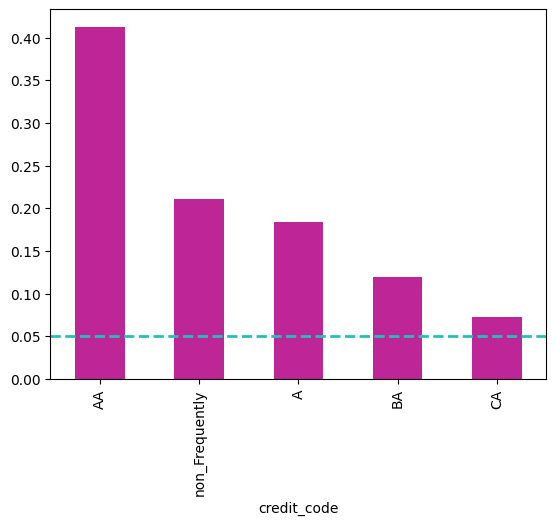

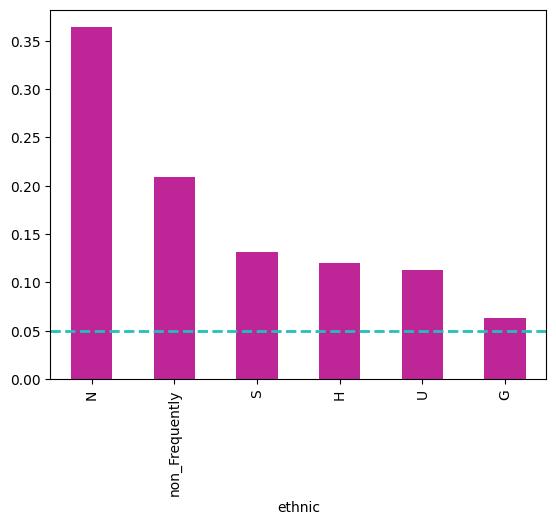

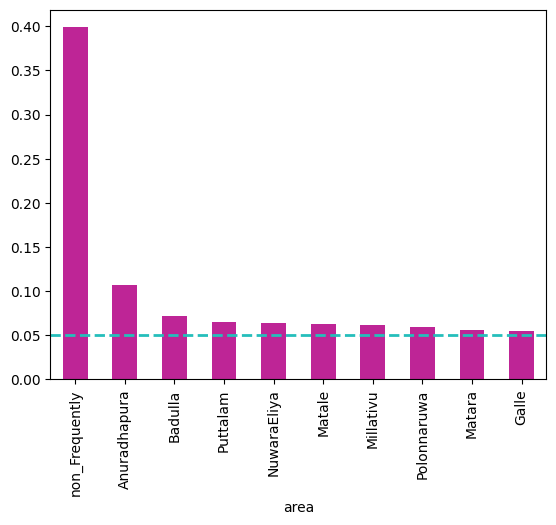

In [41]:
#plot categorical variables ( with newly introduced non_frequently )
for n in highCarVal:
    fig=(X_train[n].value_counts()/len(X_train)).plot.bar(color='#be2596')
    fig.set_xlabel(n)
    plt.axhline(y=0.05, color='#25BEBB', linewidth=2, linestyle='--')
    plt.show()
    


In [42]:
X_train

M_Revenue      M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
36267   7.402871  27.372431      6.707459  0.000000      8.062258  4.769696   
464     7.482814  15.329710      5.914389  0.247500      6.204837  3.670831   
14601   3.536948  10.246951      3.851298  0.000000      0.000000  0.000000   
45416   7.105456  15.394804      7.071068  0.000000      0.000000  0.000000   
155     5.842089  11.543396      5.476313  0.000000      4.795832  2.034699   
...          ...        ...           ...       ...           ...       ...   
40059   5.476313   3.535534      6.323765  0.000000      0.000000  0.000000   
28017   5.476313   9.643651      6.323765  0.000000      0.000000  0.000000   
29199   7.351530  15.898113      6.323765  1.316245      7.921490  4.686417   
40061   5.500909   8.514693      6.323765  0.000000      0.000000  0.000000   
17673   5.823659  17.428425      5.808614  0.000000      0.500000  0.175000   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...       lor  \
36267   4.769696       0.0000        10.665365    3.916312  ...  2.485405   
464     3.670831       0.0000         6.403124    2.985381  ...  2.485405   
14601   0.000000       0.0000         7.549834    3.536948  ...  1.000000   
45416   0.000000       0.4875         5.744563   -0.487500  ...  2.485405   
155     2.034699       0.0000         5.024938    2.034699  ...  2.449490   
...          ...          ...              ...         ...  ...       ...   
40059   0.000000       0.0000         1.224745    0.000000  ...  2.645751   
28017   0.000000       0.0000         8.660254    0.000000  ...  1.732051   
29199   4.686417       0.3600        15.288885    4.904590  ...  2.485405   
40061   0.000000       0.0000         5.700877   -0.270000  ...  3.872983   
17673   0.175000       0.0000         2.958040    2.021138  ...  2.485405   

       dwlltype  marital    adults  infobase  HHstatin          ethnic  \
36267         S        U  1.590700         M         C               N   
464           S        U  1.590700         M         C               H   
14601         S        M  1.414214         M         I  non_Frequently   
45416         S        U  1.590700         M         C               S   
155           S        A  1.414214         M         C               N   
...         ...      ...       ...       ...       ...             ...   
40059         S        M  1.732051         M         C               G   
28017         M        U  1.414214         M         C               H   
29199         S        U  1.590700         M         C  non_Frequently   
40061         S        A  1.414214         M         C               S   
17673         S        U  1.414214         M         I               N   

       kid0_2  creditcd    eqpdays  
36267       U         N   6.164414  
464         U         N  29.137605  
14601       U         Y  15.748016  
45416       U         N   3.316625  
155         U         Y  24.959968  
...       ...       ...        ...  
40059       U         Y  17.435596  
28017       U         Y  19.723083  
29199       U         N  20.542639  
40061       U         Y  14.000000  
17673       U         Y  25.219040  

[36828 rows x 79 columns]

In [43]:
cat_col= X_train.select_dtypes(include='object').columns
cat_col

Index(['credit_code', 'acc_spend', 'social_group', 'area', 'dualband',
       'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital',
       'infobase', 'HHstatin', 'ethnic', 'kid0_2', 'creditcd'],
      dtype='object')

# Encoding

In [44]:
#encoding
def cat_countEncoding(df_train,df_test):
    df_train_countE_temp=df_train.copy()
    df_test_countE_temp=df_test.copy()
    # count encoding - encode base on count 
    for cat_col_names in cat_col:
        count_map=df_train_countE_temp[cat_col_names].value_counts().to_dict()
        #print(count_map)
        df_train_countE_temp[cat_col_names+'_count']=df_train_countE_temp[cat_col_names].map(count_map)
        df_test_countE_temp[cat_col_names+'_count']=df_test_countE_temp[cat_col_names].map(count_map)
        #print(df_train_countE_temp)
    return df_train_countE_temp,df_test_countE_temp

X_train_Count_Encode,X_test_count_Encode=cat_countEncoding(X_train,X_test)
#X_test_count_Encode

# label order encoding 

def cat_OrderLabelEncoder(df_train,df_test,y_train,y_test):
    df_train_orderE_temp=pd.concat([df_train,y_train],axis=1).copy()
    df_test_orderE_temp=pd.concat([df_test,y_test],axis=1).copy()
    
    for cat_col_names in cat_col:
        ordered_lbl=df_train_orderE_temp.groupby([cat_col_names])['churn_status'].mean().sort_values().index
        ord_lbl={k: i for i, k in enumerate(ordered_lbl,0)}
        
        
        
        df_train_orderE_temp[cat_col_names+'_order']=df_train_orderE_temp[cat_col_names].map(ord_lbl)
        df_test_orderE_temp[cat_col_names+'_order']=df_test_orderE_temp[cat_col_names].map(ord_lbl)
        
    df_train_orderE_temp.drop(['churn_status'],axis=1, inplace=True)
    df_test_orderE_temp.drop(['churn_status'],axis=1, inplace=True)
    
    return df_train_orderE_temp,df_test_orderE_temp

X_train_order_Encode,X_test_order_Encode=cat_OrderLabelEncoder(X_train_Count_Encode,X_test_count_Encode,y_train,y_test)
X_train_order_Encode
        
   #mean encoding        
def cat_mean_Encode(df_train,df_test,y_train,y_test):
    X_train_mean_Encode=pd.concat([df_train,y_train],axis=1).copy()
    X_test_mean_Encode=pd.concat([df_test,y_test],axis=1).copy()
    
    for cat_col_names in cat_col:
        ordered_lbl=X_train_mean_Encode.groupby([cat_col_names])['churn_status'].mean().to_dict()
        
        X_train_mean_Encode[cat_col_names+"_meanEncode"]=X_train_mean_Encode[cat_col_names].map(ordered_lbl)
        X_test_mean_Encode[cat_col_names+"_meanEncode"]=X_test_mean_Encode[cat_col_names].map(ordered_lbl)
    
    X_train_mean_Encode.drop(['churn_status'],axis=1,inplace=True)
    X_test_mean_Encode.drop(['churn_status'],axis=1,inplace=True)
    
    return X_train_mean_Encode,X_test_mean_Encode

X_train_mean_Encode,X_test_mean_Encode=cat_mean_Encode(X_train_order_Encode,X_test_order_Encode,y_train,y_test)
X_train_mean_Encode

M_Revenue      M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
36267   7.402871  27.372431      6.707459  0.000000      8.062258  4.769696   
464     7.482814  15.329710      5.914389  0.247500      6.204837  3.670831   
14601   3.536948  10.246951      3.851298  0.000000      0.000000  0.000000   
45416   7.105456  15.394804      7.071068  0.000000      0.000000  0.000000   
155     5.842089  11.543396      5.476313  0.000000      4.795832  2.034699   
...          ...        ...           ...       ...           ...       ...   
40059   5.476313   3.535534      6.323765  0.000000      0.000000  0.000000   
28017   5.476313   9.643651      6.323765  0.000000      0.000000  0.000000   
29199   7.351530  15.898113      6.323765  1.316245      7.921490  4.686417   
40061   5.500909   8.514693      6.323765  0.000000      0.000000  0.000000   
17673   5.823659  17.428425      5.808614  0.000000      0.500000  0.175000   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  \
36267   4.769696       0.0000        10.665365    3.916312  ...   
464     3.670831       0.0000         6.403124    2.985381  ...   
14601   0.000000       0.0000         7.549834    3.536948  ...   
45416   0.000000       0.4875         5.744563   -0.487500  ...   
155     2.034699       0.0000         5.024938    2.034699  ...   
...          ...          ...              ...         ...  ...   
40059   0.000000       0.0000         1.224745    0.000000  ...   
28017   0.000000       0.0000         8.660254    0.000000  ...   
29199   4.686417       0.3600        15.288885    4.904590  ...   
40061   0.000000       0.0000         5.700877   -0.270000  ...   
17673   0.175000       0.0000         2.958040    2.021138  ...   

       refurb_new_meanEncode  hnd_webcap_meanEncode  ownrent_meanEncode  \
36267               0.500653               0.495556            0.507979   
464                 0.558244               0.495556            0.507979   
14601               0.558244               0.565684            0.507979   
45416               0.500653               0.495556            0.507979   
155                 0.500653               0.495556            0.507979   
...                      ...                    ...                 ...   
40059               0.558244               0.495556            0.507979   
28017               0.500653               0.495556            0.507979   
29199               0.500653               0.495556            0.507979   
40061               0.500653               0.495556            0.507979   
17673               0.500653               0.495556            0.507979   

       dwlltype_meanEncode  marital_meanEncode  infobase_meanEncode  \
36267             0.505171            0.532198             0.508447   
464               0.505171            0.532198             0.508447   
14601             0.505171            0.486752             0.508447   
45416             0.505171            0.532198             0.508447   
155               0.505171            0.501333             0.508447   
...                    ...                 ...                  ...   
40059             0.505171            0.486752             0.508447   
28017             0.519530            0.532198             0.508447   
29199             0.505171            0.532198             0.508447   
40061             0.505171            0.501333             0.508447   
17673             0.505171            0.532198             0.508447   

       HHstatin_meanEncode  ethnic_meanEncode  kid0_2_meanEncode  \
36267             0.510179           0.492239           0.507101   
464               0.510179           0.537537           0.507101   
14601             0.487884           0.520603           0.507101   
45416             0.510179           0.495027           0.507101   
155               0.510179           0.492239           0.507101   
...                    ...                ...                ...   
40059             0.510

In [45]:
X_train_mean_Encode = X_train_mean_Encode.drop(columns=cat_col)
X_test_mean_Encode = X_test_mean_Encode.drop(columns=cat_col)

In [46]:
X_train_mean_Encode

M_Revenue      M_Min  M_rec_charge  d_charge  over_min_use  over_rev  \
36267   7.402871  27.372431      6.707459  0.000000      8.062258  4.769696   
464     7.482814  15.329710      5.914389  0.247500      6.204837  3.670831   
14601   3.536948  10.246951      3.851298  0.000000      0.000000  0.000000   
45416   7.105456  15.394804      7.071068  0.000000      0.000000  0.000000   
155     5.842089  11.543396      5.476313  0.000000      4.795832  2.034699   
...          ...        ...           ...       ...           ...       ...   
40059   5.476313   3.535534      6.323765  0.000000      0.000000  0.000000   
28017   5.476313   9.643651      6.323765  0.000000      0.000000  0.000000   
29199   7.351530  15.898113      6.323765  1.316245      7.921490  4.686417   
40061   5.500909   8.514693      6.323765  0.000000      0.000000  0.000000   
17673   5.823659  17.428425      5.808614  0.000000      0.500000  0.175000   

       voice_rev  num_roaming  charge_prev_mnt  change_rev  ...  \
36267   4.769696       0.0000        10.665365    3.916312  ...   
464     3.670831       0.0000         6.403124    2.985381  ...   
14601   0.000000       0.0000         7.549834    3.536948  ...   
45416   0.000000       0.4875         5.744563   -0.487500  ...   
155     2.034699       0.0000         5.024938    2.034699  ...   
...          ...          ...              ...         ...  ...   
40059   0.000000       0.0000         1.224745    0.000000  ...   
28017   0.000000       0.0000         8.660254    0.000000  ...   
29199   4.686417       0.3600        15.288885    4.904590  ...   
40061   0.000000       0.0000         5.700877   -0.270000  ...   
17673   0.175000       0.0000         2.958040    2.021138  ...   

       refurb_new_meanEncode  hnd_webcap_meanEncode  ownrent_meanEncode  \
36267               0.500653               0.495556            0.507979   
464                 0.558244               0.495556            0.507979   
14601               0.558244               0.565684            0.507979   
45416               0.500653               0.495556            0.507979   
155                 0.500653               0.495556            0.507979   
...                      ...                    ...                 ...   
40059               0.558244               0.495556            0.507979   
28017               0.500653               0.495556            0.507979   
29199               0.500653               0.495556            0.507979   
40061               0.500653               0.495556            0.507979   
17673               0.500653               0.495556            0.507979   

       dwlltype_meanEncode  marital_meanEncode  infobase_meanEncode  \
36267             0.505171            0.532198             0.508447   
464               0.505171            0.532198             0.508447   
14601             0.505171            0.486752             0.508447   
45416             0.505171            0.532198             0.508447   
155               0.505171            0.501333             0.508447   
...                    ...                 ...                  ...   
40059             0.505171            0.486752             0.508447   
28017             0.519530            0.532198             0.508447   
29199             0.505171            0.532198             0.508447   
40061             0.505171            0.501333             0.508447   
17673             0.505171            0.532198             0.508447   

       HHstatin_meanEncode  ethnic_meanEncode  kid0_2_meanEncode  \
36267             0.510179           0.492239           0.507101   
464               0.510179           0.537537           0.507101   
14601             0.487884           0.520603           0.507101   
45416             0.510179           0.495027           0.507101   
155               0.510179           0.492239           0.507101   
...                    ...                ...                ...   
40059             0.510

In [47]:
y_test

4772     1.0
5459     1.0
31041    0.0
43344    0.0
28185    1.0
        ... 
37249    1.0
7808     1.0
5575     0.0
19282    0.0
792      1.0
Name: churn_status, Length: 9208, dtype: float64

In [48]:
X_train_mean_Encode = pd.DataFrame(X_train_mean_Encode)
X_test_mean_Encode = pd.DataFrame(X_test_mean_Encode)

In [49]:
feature_names =X_train_mean_Encode.columns.to_list()

In [50]:
for col in X_test_mean_Encode.columns:
    if(X_train_mean_Encode[col].isnull().sum() > 0):
        print(col)

In [51]:
for col in X_test_mean_Encode.columns:
    if(X_test_mean_Encode[col].isnull().sum() > 0):
        print(col)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_mean_Encode)
X_test = sc.transform(X_test_mean_Encode)


In [53]:
y_test.shape

(9208,)

## Random Forest Classifier 

In [54]:

from sklearn.ensemble import RandomForestRegressor
acc_scoredict={}
for i in range (1,20):
    rf_regressor = RandomForestRegressor(n_estimators=i, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    y_pred=(y_pred>=0.5).astype(int)
    acc_score=accuracy_score(y_test,y_pred)
    acc_scoredict[i]=acc_score
print(acc_scoredict)

{1: 0.5537576020851434, 2: 0.5575586446568201, 3: 0.5672241529105126, 4: 0.5650521285838401, 5: 0.5767810599478714, 6: 0.5775412684622068, 7: 0.5810165073848828, 8: 0.5842745438748914, 9: 0.5849261511728931, 10: 0.5895960034752389, 11: 0.5920938314509122, 12: 0.5957862728062554, 13: 0.5933970460469157, 14: 0.5966550825369245, 15: 0.5928540399652477, 16: 0.5998045178105995, 17: 0.595894874022589, 18: 0.6006733275412685, 19: 0.5951346655082537}


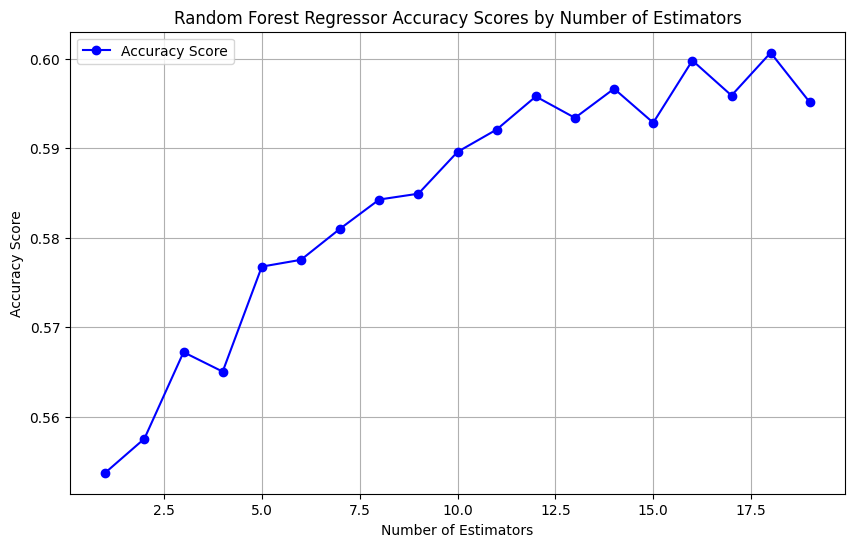

In [55]:
acc_scoredict
plt.figure(figsize=(10, 6))
plt.plot(acc_scoredict.keys(), acc_scoredict.values(), marker='o', linestyle='-', color='b', label='Accuracy Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Regressor Accuracy Scores by Number of Estimators')
plt.grid(True)
plt.legend()
plt.show()


In [56]:
rf_regressor_highAccurate = RandomForestRegressor(n_estimators=18, random_state=42)
rf_regressor_highAccurate.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [57]:
y_pred

array([0.78947368, 0.57894737, 0.68421053, ..., 0.26315789, 0.21052632,
       0.31578947])

In [58]:
y_pred=(y_pred>=0.5).astype(int)

In [59]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

## Accuracy 

Accuracy Score : 0.5951346655082537
Percision Score : 0.597808105872622
Recall Score : 0.618528027385537
F1 Score : 0.6079915878023134


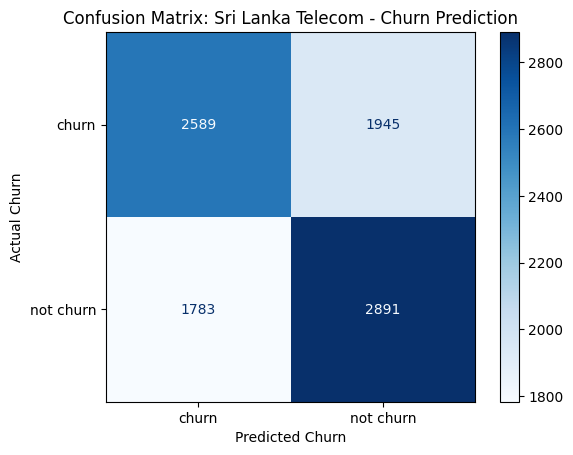

In [60]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
    
    #confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
 
   
    
checkAccuracy(y_pred,y_test)

## Gradian boost 

In [61]:
gb=GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
#y_pred = gb.predict(X_test)
#acc_score=accuracy_score(y_test,y_pred)
#acc_score_grdboost[i]=acc_score
#acc_score_grdboost

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [62]:
y_pred = gb.predict(X_test)
y_pred

array([1., 1., 0., ..., 0., 0., 0.])

In [63]:
y_test

4772     1.0
5459     1.0
31041    0.0
43344    0.0
28185    1.0
        ... 
37249    1.0
7808     1.0
5575     0.0
19282    0.0
792      1.0
Name: churn_status, Length: 9208, dtype: float64

Accuracy Score : 0.6322762814943528
Percision Score : 0.626324048646528
Recall Score : 0.6831407787762088
F1 Score : 0.6534997953336062
              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61      4534
         1.0       0.63      0.68      0.65      4674

    accuracy                           0.63      9208
   macro avg       0.63      0.63      0.63      9208
weighted avg       0.63      0.63      0.63      9208



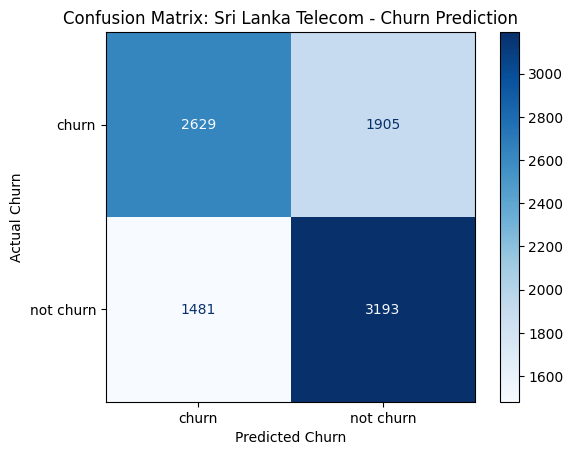

In [64]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
    print(classification_report(y_test, y_pred))
     #confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
   
   
    
checkAccuracy(y_pred,y_test)

## Feature importance 


eqpdays: 0.1876678180366057
ser_mnt: 0.12176002101944032
M_Min: 0.10751117148551405
hnd_price: 0.05785625893310394
M_rec_charge: 0.05045974885380094
avg_mon_call: 0.037955879478166414
charge_prev_mnt: 0.03607871684776527
avg_mon_min: 0.032706971056961326
change_rev: 0.02737981272459125
lor: 0.021757783090646767
totcalls: 0.020131965049143177
avg_mon_cal_3: 0.018139755854799672
com_call_u: 0.018004563320148364
drop_voice: 0.01368557792647558
M_Revenue: 0.010388423805662383
u_sub: 0.009897876432497352
over_rev: 0.00945402307758172
over_min_use: 0.008925271097431365
not_answer_voice: 0.008442698727381709
act_sub: 0.008342639222256889


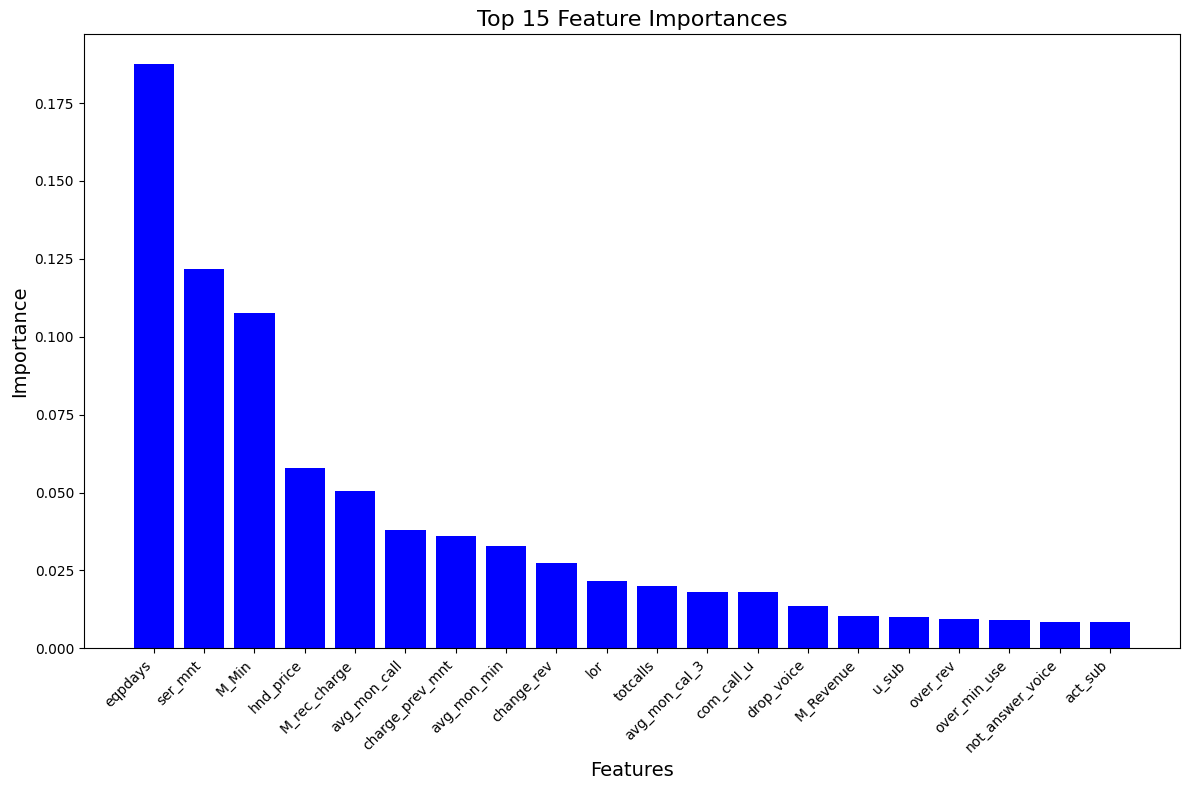

In [65]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]
top_10_indices = indices[:20]
top_10_feature_names = [feature_names[i] for i in top_10_indices]
top_10_importances = importances[top_10_indices]
for name, importance in zip(top_10_feature_names, top_10_importances):
    print(f"{name}: {importance}")
plt.figure(figsize=(12, 8))
plt.bar(top_10_feature_names, top_10_importances, color='blue')
plt.title('Top 15 Feature Importances', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## KNN classifier 

In [66]:
knn = KNeighborsClassifier(metric="manhattan",n_neighbors=5,weights="distance")
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [67]:
# train accuracy 
y_train_pred=knn.predict(X_train)

In [68]:
y_pred=(y_pred>=0.5).astype(int)

Accuracy Score : 0.5395308427454387
Percision Score : 0.5474420638390906
Recall Score : 0.535729567821994
F1 Score : 0.541522491349481


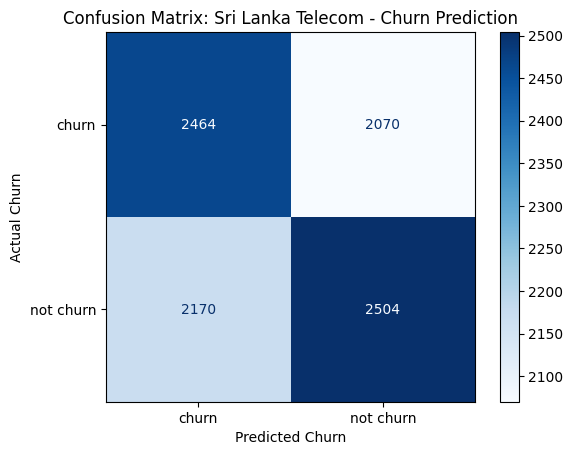

In [69]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
     #confusion matrix
    
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
 
   
    
checkAccuracy(y_pred,y_test)

## Light Gradiant Boost 

In [70]:
pip install lightgbm


In [71]:
import lightgbm as lgb

In [72]:
setParameters={ 'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.9}
lgb_traning_data_set=lgb.Dataset(X_train,label=y_train)
lgb_model=lgb.train(setParameters,lgb_traning_data_set,num_boost_round=100)
y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 18707, number of negative: 18121
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10737
[LightGBM] [Info] Number of data points in the train set: 36828, number of used features: 102
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507956 -> initscore=0.031826
[LightGBM] [Info] Start training from score 0.031826


In [73]:
y_pred

array([0.6916606 , 0.65790256, 0.42563693, ..., 0.32560555, 0.36700484,
       0.40297434])

In [74]:
y_pred=(y_pred>=0.5).astype(int)

Accuracy Score : 0.6344483058210252
Percision Score : 0.6303827751196173
Recall Score : 0.6765083440308087
F1 Score : 0.6526315789473685


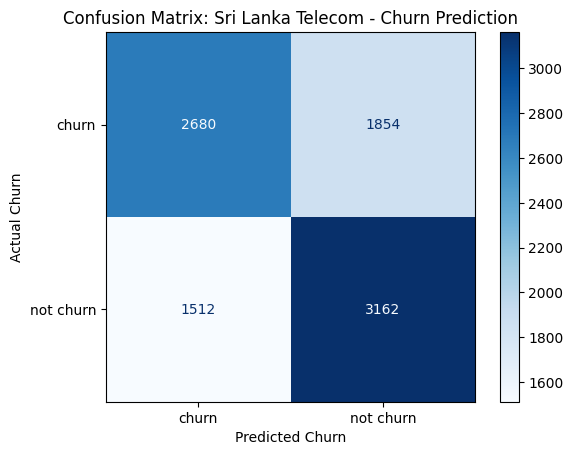

In [75]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
    
     #confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
 
   
    
checkAccuracy(y_pred,y_test)

## Naive bais 

In [76]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

model = GaussianNB()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, y_train)
best_gnb = grid_search.best_estimator_
y_pred = best_gnb.predict(X_test)
#accuracy = accuracy_score(y_test, y_predict)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Accuracy Score : 0.5536490008688097
Percision Score : 0.542831105710814
Recall Score : 0.764655541292255
F1 Score : 0.6349262746491383


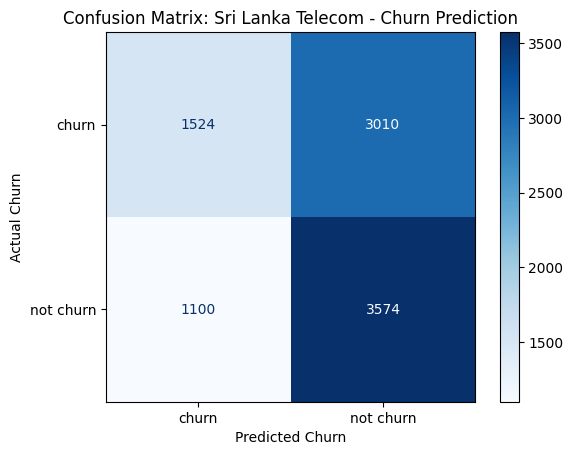

In [77]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
     #confusion matrix
    
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
 
   
    
checkAccuracy(y_pred,y_test)

## Adaboost 

In [78]:
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=500,  
    learning_rate=1,       
    random_state=42
)
model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=500, random_state=42)

In [79]:
y_pred=model.predict(X_test)

Accuracy Score : 0.6032797567332754
Percision Score : 0.6040774719673803
Recall Score : 0.6339323919554986
F1 Score : 0.618644952500261


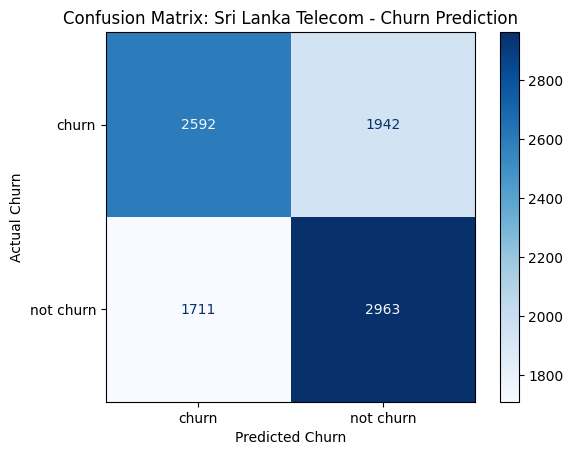

In [80]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
    
     #confusion matrix
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
 
   
    
checkAccuracy(y_pred,y_test)

## Model Fine tune (Hyper paramters)

## Fine-tune LGBM

In [81]:
pip install lightgbm scikit-learn scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [82]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [83]:
para_list_LGBM={
    'num_leaves': Integer(31, 200),
    'learning_rate': Real(0.01, 0.2, 'log-uniform'),
    'feature_fraction': Real(0.6, 1.0),
    'bagging_fraction': Real(0.6, 1.0),
    'max_depth': Integer(-1, 50),
    'min_data_in_leaf': Integer(20, 200),
    'lambda_l1': Real(0.0, 1.0, 'uniform'),
    'lambda_l2': Real(0.0, 1.0, 'uniform')
}

In [84]:
lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', n_estimators=100)
bayes_search = BayesSearchCV(
    estimator=lgb_estimator,
    search_spaces=para_list_LGBM,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='neg_log_loss',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=LGBMClassifier(metric='binary_logloss',
                                       objective='binary'),
              n_jobs=-1, random_state=42, scoring='neg_log_loss',
              search_spaces={'bagging_fraction': Real(low=0.6, high=1.0, prior='uniform', transform='normalize'),
                             'feature_fraction': Real(low=0.6, high=1.0, prior='uniform', transform='normalize'),
                             'lambda_l1': Real(low=0.0, high=1.0, prio...
                             'lambda_l2': Real(low=0.0, high=1.0, prior='uniform', transform='normalize'),
                             'learning_rate': Real(low=0.01, high=0.2, prior='log-uniform', transform='normalize'),
                             'max_depth': Integer(low=-1, high=50, prior='uniform', transform='normalize'),
                             'min_data_in_leaf': Integer(low=20, high=200, prior='uniform', transform='normalize'),
                             'num_leaves': Integer(low=31, high=200, prior='uniform', transform='normalize')},
              verbose=1)

In [85]:
best_params = bayes_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with the best parameters
final_model = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    n_estimators=100,
    **best_params
)
final_model.fit(X_train, y_train)

Best Parameters: OrderedDict([('bagging_fraction', 0.6056173284435363), ('feature_fraction', 1.0), ('lambda_l1', 0.45066439949434706), ('lambda_l2', 0.21545919864891155), ('learning_rate', 0.098331452911655), ('max_depth', 50), ('min_data_in_leaf', 200), ('num_leaves', 31)])
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.45066439949434706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.45066439949434706
[LightGBM] [Warning] lambda_l2 is set=0.21545919864891155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21545919864891155
[LightGBM] [Warning] bagging_fraction is set=0.6056173284435363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6056173284435363
[LightGBM] [Warning] Accuracy may be bad since you didn't 

LGBMClassifier(bagging_fraction=0.6056173284435363, feature_fraction=1.0,
               lambda_l1=0.45066439949434706, lambda_l2=0.21545919864891155,
               learning_rate=0.098331452911655, max_depth=50,
               metric='binary_logloss', min_data_in_leaf=200,
               objective='binary')

In [86]:
y_pred = final_model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.45066439949434706, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.45066439949434706
[LightGBM] [Warning] lambda_l2 is set=0.21545919864891155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.21545919864891155
[LightGBM] [Warning] bagging_fraction is set=0.6056173284435363, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6056173284435363
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


Accuracy Score : 0.6362945264986968
Percision Score : 0.6334878097924642
Recall Score : 0.6726572528883183
F1 Score : 0.652485213240635


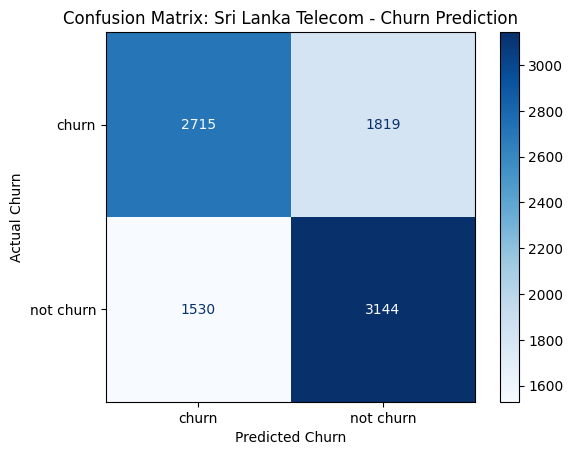

In [87]:
def checkAccuracy(y_pred,y_test):
    acc_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score :",acc_score)
    pre_Score=precision_score(y_test,y_pred)
    print("Percision Score :",pre_Score)
    rec_score=recall_score(y_test,y_pred)
    print("Recall Score :",rec_score)
    f_score=f1_score(y_test,y_pred)
    print("F1 Score :",f_score)
     #confusion matrix
    
    cm=confusion_matrix(y_test,y_pred)
    display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['churn','not churn'])
    display.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Sri Lanka Telecom - Churn Prediction')
    plt.xlabel('Predicted Churn')
    plt.ylabel('Actual Churn')
    plt.show()
 
   
    
checkAccuracy(y_pred,y_test)

M_Min: 205
charge_prev_mnt: 141
ser_mnt: 135
eqpdays: 132
M_rec_charge: 128
change_rev: 112
avg_mon_min: 91
avg_mon_call: 89
hnd_price: 83
avg_rev: 81
M_Revenue: 66
lor: 62
totcalls: 56
avg_mon_cal_3: 55
drop_voice: 52
peak_call_min_o: 51
wire_less_voice_calls: 50
not_answer_voice: 50
peak_voice: 49
drop_block_call: 49


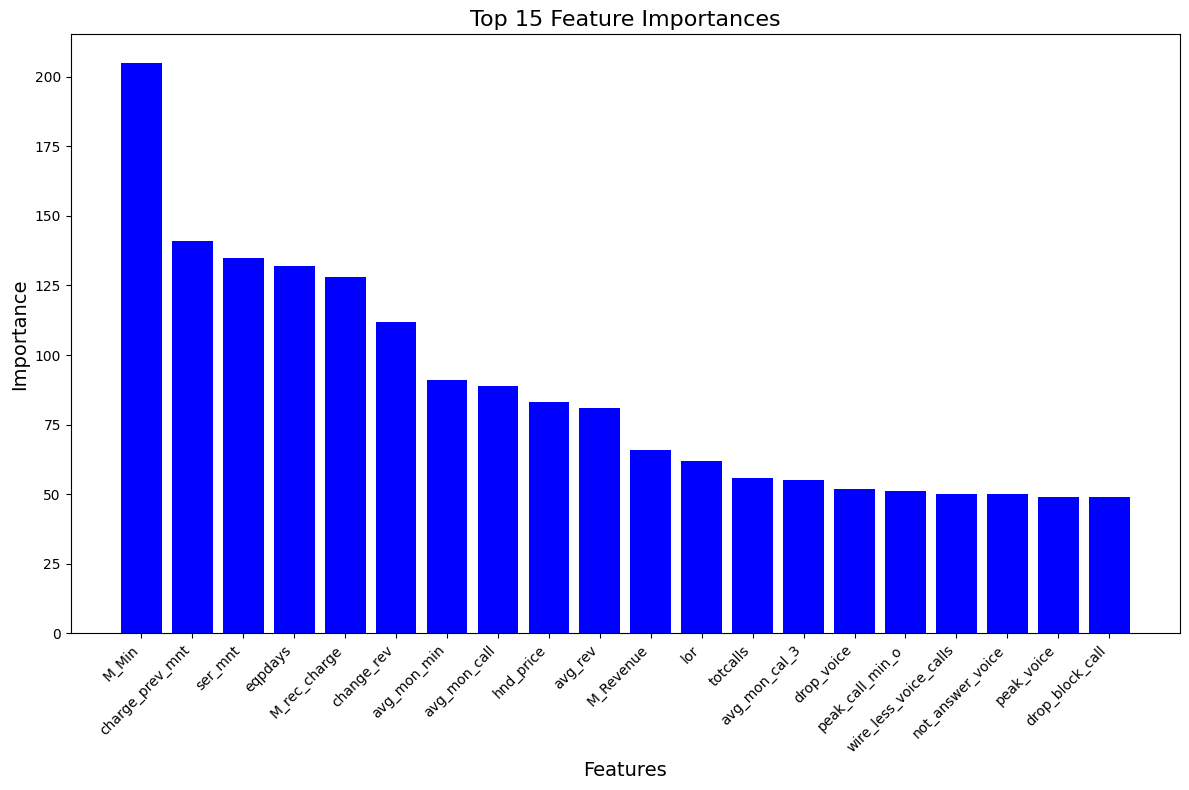

In [88]:
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_10_indices = indices[:20]
top_10_feature_names = [feature_names[i] for i in top_10_indices]
top_10_importances = importances[top_10_indices]
for name, importance in zip(top_10_feature_names, top_10_importances):
    print(f"{name}: {importance}")
plt.figure(figsize=(12, 8))
plt.bar(top_10_feature_names, top_10_importances, color='blue')
plt.title('Top 15 Feature Importances', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## KNN 

In [89]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

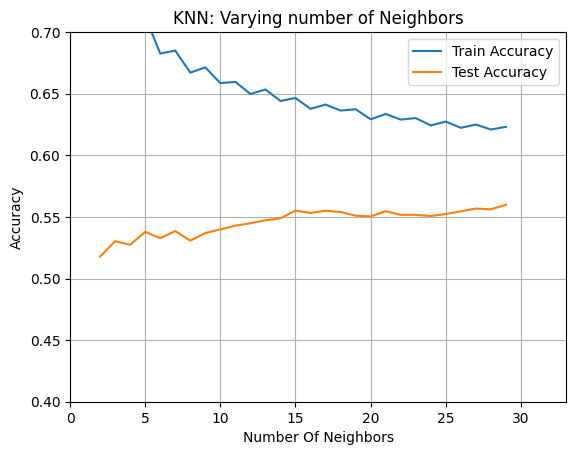

In [90]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.40, 0.70)
plt.grid()
plt.show()

In [91]:
print(train_score)

{2: 0.7627620288910612, 3: 0.7690072770717932, 4: 0.7076680786358206, 5: 0.7127185836863256, 6: 0.682632779406973, 7: 0.685022265667427, 8: 0.6671554252199413, 9: 0.6713641794286955, 10: 0.6586021505376344, 11: 0.6596068208971435, 12: 0.6497773433257304, 13: 0.6534430324752906, 14: 0.6441023134571522, 15: 0.6465189529705658, 16: 0.6377212990116216, 17: 0.6411969153904638, 18: 0.6363364831106767, 19: 0.6374226132290648, 20: 0.629222330835234, 21: 0.6335668513087868, 22: 0.6290051048115565, 23: 0.6302270011947432, 24: 0.6242532855436081, 25: 0.6273759096339742, 26: 0.6223254045834691, 27: 0.6249592701205604, 28: 0.6209677419354839, 29: 0.6231128489193005}


In [92]:
print(test_score)

{2: 0.5178105994787141, 3: 0.5302997393570807, 4: 0.527367506516073, 5: 0.5379018245004344, 6: 0.5326889661164205, 7: 0.5385534317984362, 8: 0.5307341442224153, 9: 0.5369244135534318, 10: 0.5398566463944396, 11: 0.5428974804517811, 12: 0.5448523023457863, 13: 0.547241529105126, 14: 0.5488705473501303, 15: 0.5551694178974804, 16: 0.5532145960034752, 17: 0.5550608166811468, 18: 0.5539748045178106, 19: 0.5510425716768028, 20: 0.5503909643788011, 21: 0.5546264118158123, 22: 0.5516941789748045, 23: 0.5516941789748045, 24: 0.5507167680278019, 25: 0.5523457862728063, 26: 0.5545178105994787, 27: 0.5567984361424848, 28: 0.5561468288444831, 29: 0.5598392701998263}


In [93]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

29


In [94]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 29}


In [95]:
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(accuracy_score))

Accuracy for testing dataset after tuning : 55.98%


In [96]:
y_pred=(y_pred>=0.5).astype(int)

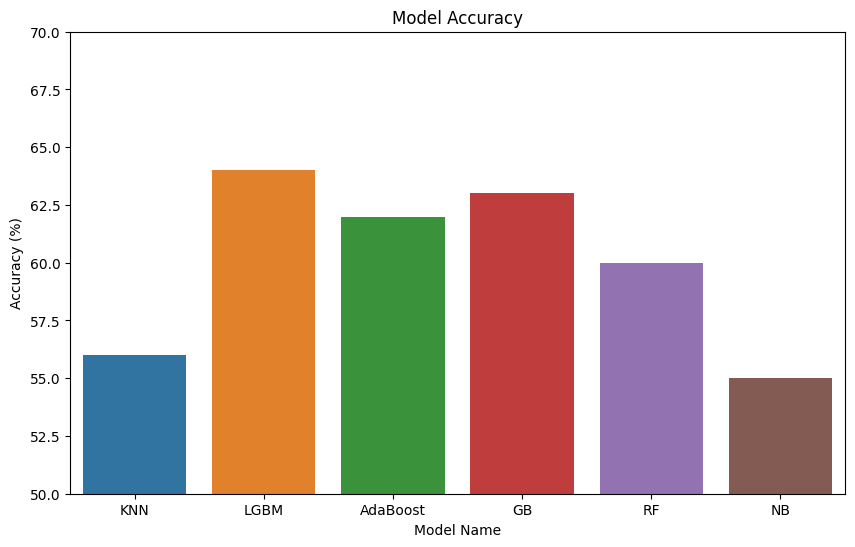

In [97]:
model_accuracy = {
    'KNN': 56,
    'LGBM': 64,
    'AdaBoost': 62,
    'GB': 63,
    'RF': 60,
    'NB': 55
}
accuracy_df = pd.DataFrame(list(model_accuracy.items()), columns=['Model','Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.ylim(50, 70)
plt.title('Model Accuracy')
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.show()